In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Getting to know the data and relevant conversions

In [3]:
df_cab_data = pd.read_csv("data/Cab_Data.csv")
df_customer_data = pd.read_csv("data/Customer_ID.csv")
df_transaction_id_data = pd.read_csv("data/Transaction_ID.csv")
df_city_data = pd.read_csv("data/City.csv")
df_cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [199]:
# Merging the data
df_merged1 = pd.merge(df_cab_data,df_transaction_id_data)
full_data = pd.merge(df_merged1,df_customer_data,on='Customer ID')

In [200]:
full_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [201]:
full_data.isna().sum() # no null values are present

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [202]:
full_data.columns # columns need to be renamed for ease of access

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)'],
      dtype='object')

In [203]:
cols = {'Transaction ID':'transaction_id', 
        'Date of Travel':'date_of_travel', 
        'Company':'company', 
        'City':'city', 
        'KM Travelled':'km_travelled',
        'Price Charged':'price_charged', 
        'Cost of Trip':'cost_of_trip',
        'Customer ID':'customer_id', 
        'Payment_Mode': 'payment_mode',
        'Gender':'gender', 
        'Age':'age', 
        'Income (USD/Month)':'income_per_month'
        }

In [204]:
full_data.rename(columns=cols,inplace=True)

In [205]:
full_data.columns

Index(['transaction_id', 'date_of_travel', 'company', 'city', 'km_travelled',
       'price_charged', 'cost_of_trip', 'customer_id', 'payment_mode',
       'gender', 'age', 'income_per_month'],
      dtype='object')

In [207]:
# Reordering the columns

new_oder = [
            'customer_id',
            'gender',  
            'age', 
            'income_per_month',
            'transaction_id', 
            'company', 
            'city', 
            'date_of_travel',
            'payment_mode', 
            'km_travelled',
            'price_charged', 
            'cost_of_trip', 
            ]

full_data = full_data[new_oder]

In [208]:
full_data.head()

,customer_id,gender,age,income_per_month,transaction_id,company,city,date_of_travel,payment_mode,km_travelled,price_charged,cost_of_trip
0,29290,Male,28,10813,10000011,Pink Cab,ATLANTA GA,42377,Card,30.45,370.95,313.6350
1,29290,Male,28,10813,10351127,Yellow Cab,ATLANTA GA,43302,Cash,26.19,598.70,317.4228
2,29290,Male,28,10813,10412921,Yellow Cab,ATLANTA GA,43427,Card,42.55,792.05,597.4020
3,27703,Male,27,9237,10000012,Pink Cab,ATLANTA GA,42375,Card,28.62,358.52,334.8540
4,27703,Male,27,9237,10320494,Yellow Cab,ATLANTA GA,43211,Card,36.38,721.10,467.1192


In [209]:
from datetime import datetime

full_data['date_of_travel'] = pd.to_datetime(full_data['date_of_travel'],unit='d',origin='1899-12-30') # converting dataes to readable format
full_data.head()

,customer_id,gender,age,income_per_month,transaction_id,company,city,date_of_travel,payment_mode,km_travelled,price_charged,cost_of_trip
0,29290,Male,28,10813,10000011,Pink Cab,ATLANTA GA,2016-01-08,Card,30.45,370.95,313.6350
1,29290,Male,28,10813,10351127,Yellow Cab,ATLANTA GA,2018-07-21,Cash,26.19,598.70,317.4228
2,29290,Male,28,10813,10412921,Yellow Cab,ATLANTA GA,2018-11-23,Card,42.55,792.05,597.4020
3,27703,Male,27,9237,10000012,Pink Cab,ATLANTA GA,2016-01-06,Card,28.62,358.52,334.8540
4,27703,Male,27,9237,10320494,Yellow Cab,ATLANTA GA,2018-04-21,Card,36.38,721.10,467.1192


In [210]:
full_data.duplicated().sum() # No duplicates

0

In [211]:
full_data.describe(include=[np.number])

,customer_id,age,income_per_month,transaction_id,km_travelled,price_charged,cost_of_trip
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,19191.652115,35.336705,15048.822937,1.022076e+07,22.567254,423.443311,286.190113
std,21012.412463,12.594234,7969.409482,1.268058e+05,12.233526,274.378911,157.993661
min,1.000000,18.000000,2000.000000,1.000001e+07,1.900000,15.600000,19.000000
25%,2705.000000,25.000000,8424.000000,1.011081e+07,12.000000,206.437500,151.200000
50%,7459.000000,33.000000,14685.000000,1.022104e+07,22.440000,386.360000,282.480000
75%,36078.000000,42.000000,21035.000000,1.033094e+07,32.960000,583.660000,413.683200
max,60000.000000,65.000000,35000.000000,1.044011e+07,48.000000,2048.030000,691.200000


In [212]:
full_data.describe(include=['O'])

,gender,company,city,payment_mode
count,359392,359392,359392,359392
unique,2,2,19,2
top,Male,Yellow Cab,NEW YORK NY,Card
freq,205912,274681,99885,215504


**Memory Usage**


| Data-Type | Precision |
| ----------- | ----------- |
float16   | 3
float32   | 6
float64   | 15
float128  | 18

--------------------------------- 


|Data type |min|max|
| ----------- | ----------- |----------- |
|int8|-128|127|
|int16|-32768|32767|
|int32|-2147483648|2147483647|
|int64|-9223372036854775808|9223372036854775807|

In [214]:
full_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       359392 non-null  int64         
 1   gender            359392 non-null  object        
 2   age               359392 non-null  int64         
 3   income_per_month  359392 non-null  int64         
 4   transaction_id    359392 non-null  int64         
 5   company           359392 non-null  object        
 6   city              359392 non-null  object        
 7   date_of_travel    359392 non-null  datetime64[ns]
 8   payment_mode      359392 non-null  object        
 9   km_travelled      359392 non-null  float64       
 10  price_charged     359392 non-null  float64       
 11  cost_of_trip      359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 113.0 MB


In [215]:
full_data.date_of_travel.dtype

dtype('<M8[ns]')

In [216]:
def memory_magment(df):
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != np.object and col_type != np.dtype('<M8[ns]'):
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8) # int 8
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16) # int 16
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)  # in 32
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64) # int 64
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else: 
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')    

    return df
df_memory = full_data

df_memory = memory_magment(df_memory)
df_memory.head()

,customer_id,gender,age,income_per_month,transaction_id,company,city,date_of_travel,payment_mode,km_travelled,price_charged,cost_of_trip
0,29290,Male,28,10813,10000011,Pink Cab,ATLANTA GA,2016-01-08,Card,30.453125,371.0,313.75
1,29290,Male,28,10813,10351127,Yellow Cab,ATLANTA GA,2018-07-21,Cash,26.187500,598.5,317.50
2,29290,Male,28,10813,10412921,Yellow Cab,ATLANTA GA,2018-11-23,Card,42.562500,792.0,597.50
3,27703,Male,27,9237,10000012,Pink Cab,ATLANTA GA,2016-01-06,Card,28.625000,358.5,334.75
4,27703,Male,27,9237,10320494,Yellow Cab,ATLANTA GA,2018-04-21,Card,36.375000,721.0,467.00


In [217]:
df_memory.info(memory_usage='deep') # memory usage: 113.0 MB reduced to 11.4 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   customer_id       359392 non-null  int32   
 1   gender            359392 non-null  category
 2   age               359392 non-null  int8    
 3   income_per_month  359392 non-null  int32   
 4   transaction_id    359392 non-null  int32   
 5   company           359392 non-null  category
 6   city              359392 non-null  category
 7   date_of_travel    359392 non-null  category
 8   payment_mode      359392 non-null  category
 9   km_travelled      359392 non-null  float16 
 10  price_charged     359392 non-null  float16 
 11  cost_of_trip      359392 non-null  float16 
dtypes: category(5), float16(3), int32(3), int8(1)
memory usage: 11.4 MB


In [300]:
df_memory.describe(include=[np.number])

,customer_id,age,income_per_month,transaction_id,km_travelled,price_charged,cost_of_trip
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.00
mean,19191.652115,35.336705,15048.822937,1.022076e+07,NaN,NaN,NaN
std,21012.412463,12.594234,7969.409482,1.268058e+05,0.000000,NaN,NaN
min,1.000000,18.000000,2000.000000,1.000001e+07,1.900391,15.601562,19.00
25%,2705.000000,25.000000,8424.000000,1.011081e+07,12.000000,206.468750,151.25
50%,7459.000000,33.000000,14685.000000,1.022104e+07,22.437500,386.250000,282.50
75%,36078.000000,42.000000,21035.000000,1.033094e+07,32.968750,583.500000,413.75
max,60000.000000,65.000000,35000.000000,1.044011e+07,48.000000,2048.000000,691.00


In [302]:
df_memory.describe(include=['category'])

,gender,company,city,date_of_travel,payment_mode
count,359392,359392,359392,359392,359392
unique,2,2,19,1095,2
top,Male,Yellow Cab,NEW YORK NY,2018-01-05 00:00:00,Card
freq,205912,274681,99885,2022,215504


### Performing EDA

In [221]:
df_eda = df_memory 

In [222]:
df_eda.head()

,customer_id,gender,age,income_per_month,transaction_id,company,city,date_of_travel,payment_mode,km_travelled,price_charged,cost_of_trip
0,29290,Male,28,10813,10000011,Pink Cab,ATLANTA GA,2016-01-08,Card,30.453125,371.0,313.75
1,29290,Male,28,10813,10351127,Yellow Cab,ATLANTA GA,2018-07-21,Cash,26.187500,598.5,317.50
2,29290,Male,28,10813,10412921,Yellow Cab,ATLANTA GA,2018-11-23,Card,42.562500,792.0,597.50
3,27703,Male,27,9237,10000012,Pink Cab,ATLANTA GA,2016-01-06,Card,28.625000,358.5,334.75
4,27703,Male,27,9237,10320494,Yellow Cab,ATLANTA GA,2018-04-21,Card,36.375000,721.0,467.00


In [279]:
def plotting_count(x:str,hue:str):    
    try:
        fig, ax = plt.subplots(figsize=(20,5))
        sns.set_theme(style='darkgrid')

        ordering = df_eda[x].value_counts()
        my_palette = sns.color_palette('bright')
        sns.countplot(data=df_eda, x=x, hue=hue,palette=my_palette,
        order=ordering.sort_values().index[::-1], # descending order
        )
        ax.tick_params(axis='x', rotation=45)
        ax.set_title(f'Count plot of number of {x} with {hue}',fontsize=20)

        ax.set_xlabel(f"{x}", fontdict={'fontsize':20})
        ax.set_ylabel("Count", fontdict={'fontsize':20})
    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            df_eda.info(memory_usage='deep')
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            df_eda.info(memory_usage='deep')

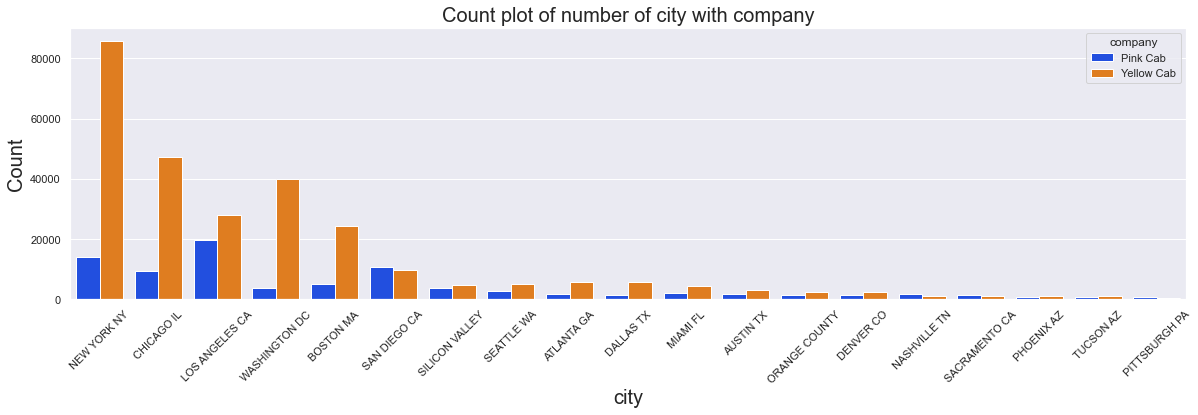

In [280]:
plotting_count('city','company') # Plot-1

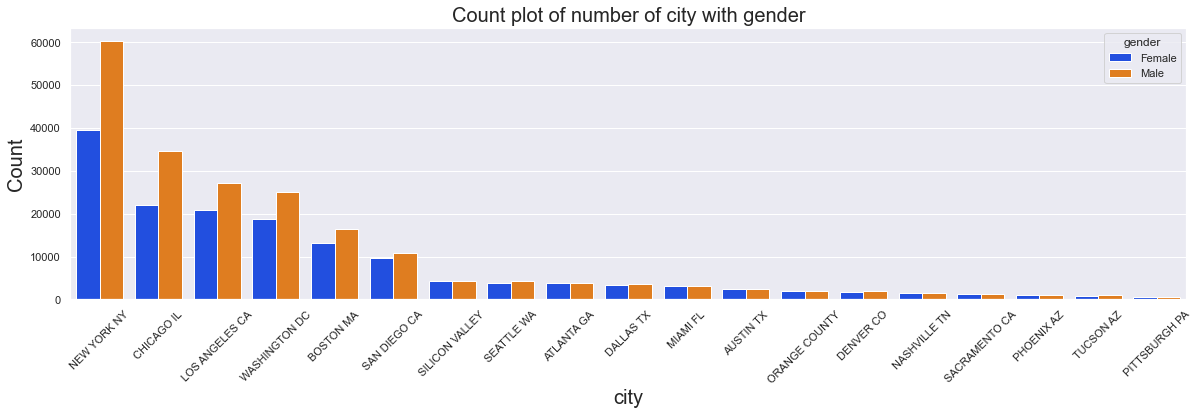

In [248]:
plotting_count('city','gender') # Plot-2

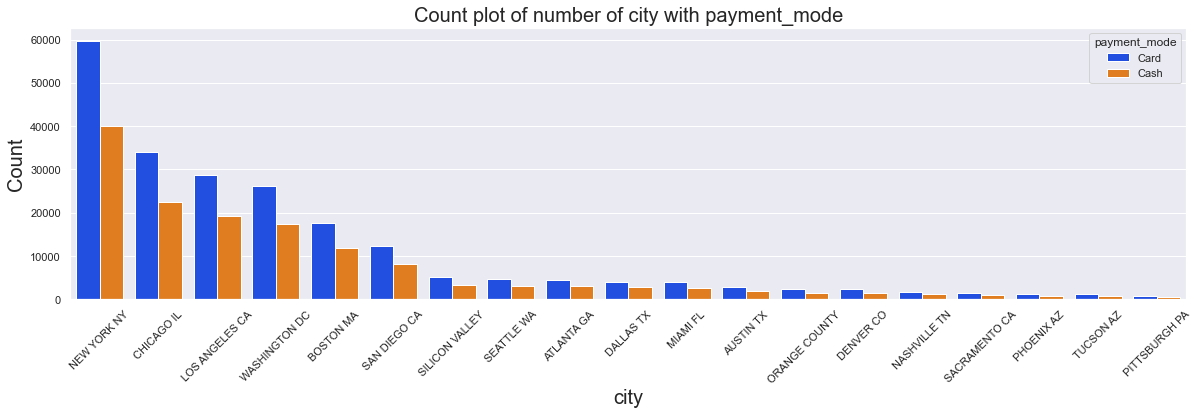

In [249]:
plotting_count('city','payment_mode') # Plot-3

**Observations from set of countplot one**
- From plot-1,Yellow Cab Company has more users than the Pink Cab Company. 
- From plot-2,NEW YORK NY, CHICAGO IL, LOS ANGELES CA, WASHINGTON DC, BOSTON MA, SAN DIEGO CA seems to be the cities to in which both Yellow Cab and Pink Cab companies have high number of transactions
- From plot-3, across all the cities, the preferred method of payment is card as it surpasses the cash payment method even though there is a good amount of users who use cash payment method.

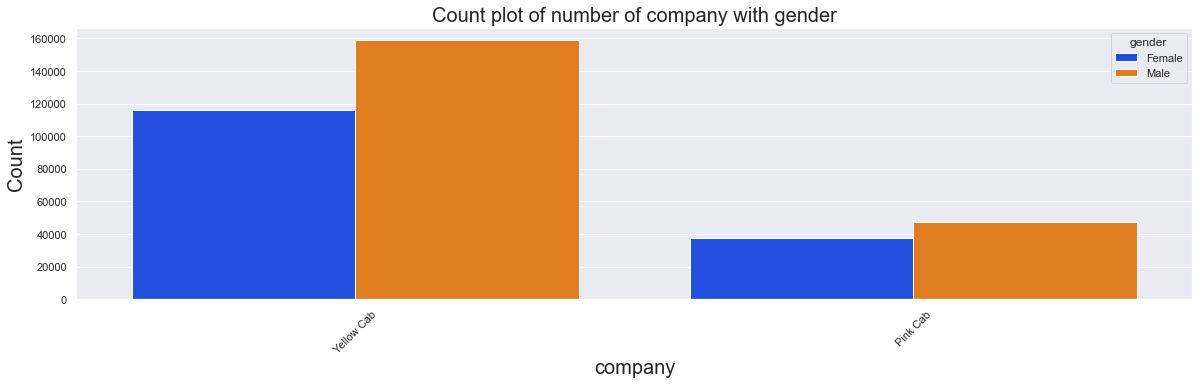

In [250]:
plotting_count('company','gender') # Plot-4

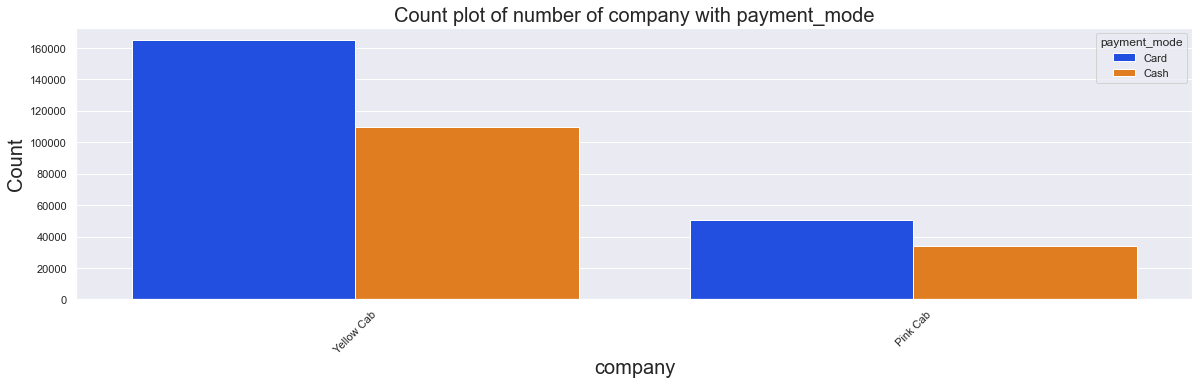

In [251]:
plotting_count('company','payment_mode') # Plot-5

**Observations from set of countplot two**
- From plot-4, we can see that most genders prefer the use of Yellow Cab company against that of Pink Cab company
- From plot-5, it can be seen that there are more transactions in the Yellow Cab company compared to the Pink Cab company. Also, it can be seen that more users prefer payment by card against to payment by cash.

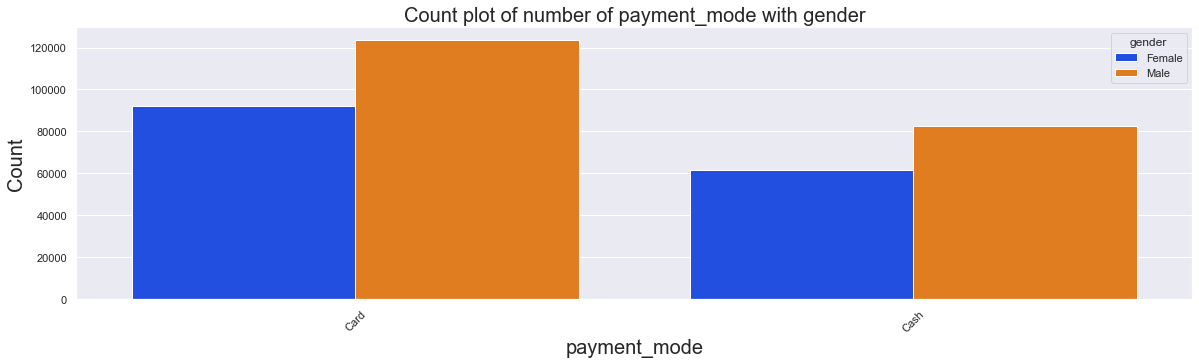

In [255]:
plotting_count('payment_mode','gender') # Plot-6

**Observations from set of countplot three**
- From plot-6, it can be seen that males prefer payment by card against payment by cash.
- Also it can be seen that more users prefer card payment.

In [303]:
# Creation of a profit column from price_charged and cost_of_trip
# Profit = price_charged - price_charged
df_eda['profit'] = df_eda.price_charged - df_eda.cost_of_trip
df_eda[['profit','price_charged', 'cost_of_trip']].head()

,profit,price_charged,cost_of_trip
0,57.25,371.0,313.75
1,281.00,598.5,317.50
2,194.50,792.0,597.50
3,23.75,358.5,334.75
4,254.00,721.0,467.00


In [473]:
def plotting_bar(x:str,group:str):
    try:
        grouped_agg = df_eda.groupby(group)[x].agg([(f"Calculated Mean {x}", 'mean'),(f"Calculated Deviation {x}", 'std')]).reset_index()
        fig,ax = plt.subplots(1,2,figsize=(20,10))

        my_palette = sns.color_palette("husl",2)
        sns.set_theme(style="darkgrid")
        sns.barplot(data=grouped_agg, x=group, y=f'Calculated Mean {x}', ax=ax[0], palette=my_palette)
        sns.barplot(data=grouped_agg, x=group, y=f'Calculated Deviation {x}', ax=ax[1], palette=my_palette)

        ax[0].set_title(f'Calculated Mean {x}',fontsize=20)
        ax[0].set_xlabel(f"{group}", fontdict={'fontsize':20})
        ax[0].set_ylabel(f"Calculated Mean {x}", fontdict={'fontsize':20})

        ax[1].set_title(f'Calculated Deviation {x}',fontsize=20)
        ax[1].set_xlabel(f"{group}", fontdict={'fontsize':20})
        ax[1].set_ylabel(f"Calculated Deviation {x}", fontdict={'fontsize':20})
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            df_eda.info(memory_usage='deep')

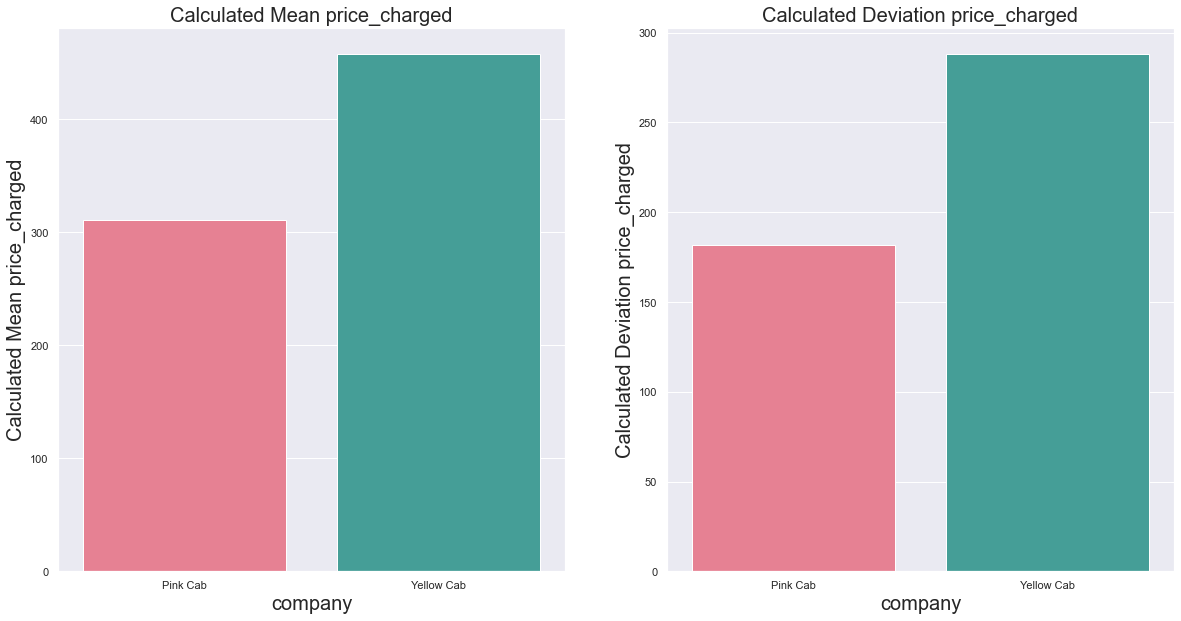

In [293]:
plotting_bar('price_charged',group='company') # Plot-7

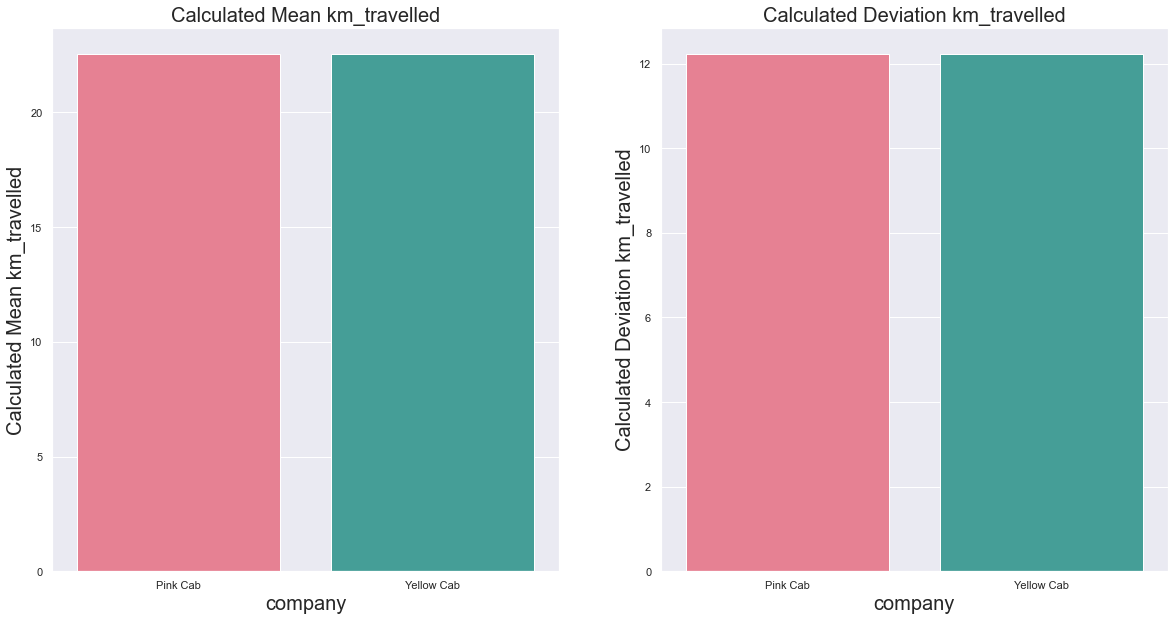

In [294]:
plotting_bar('km_travelled',group='company') # Plot-8

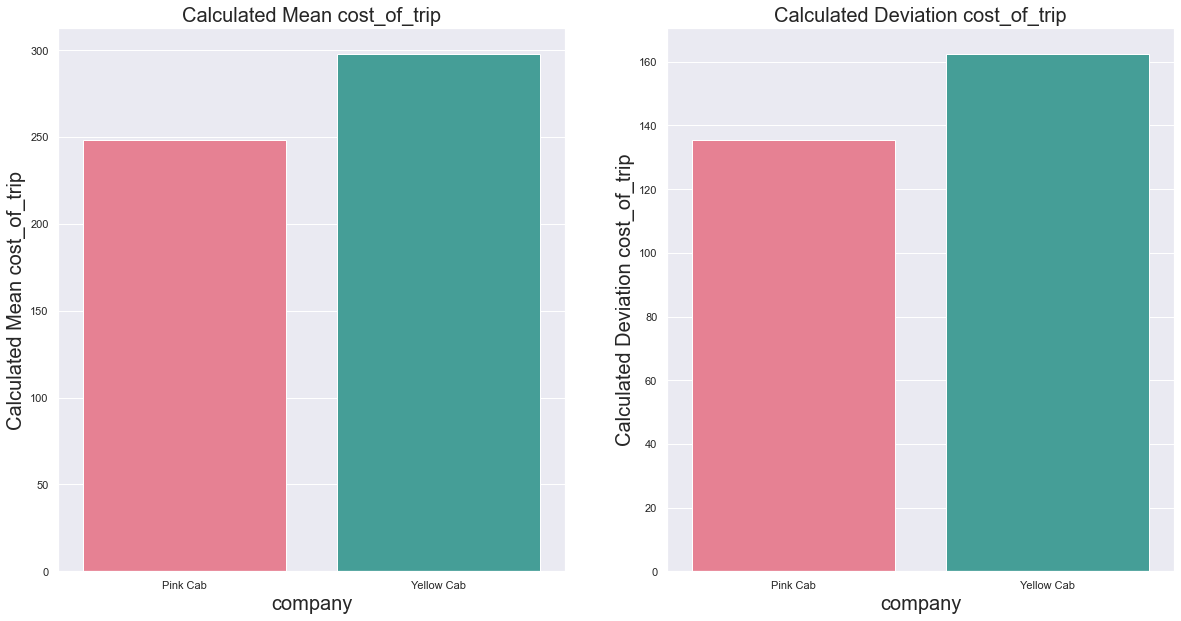

In [295]:
plotting_bar('cost_of_trip','company') # Plot-9

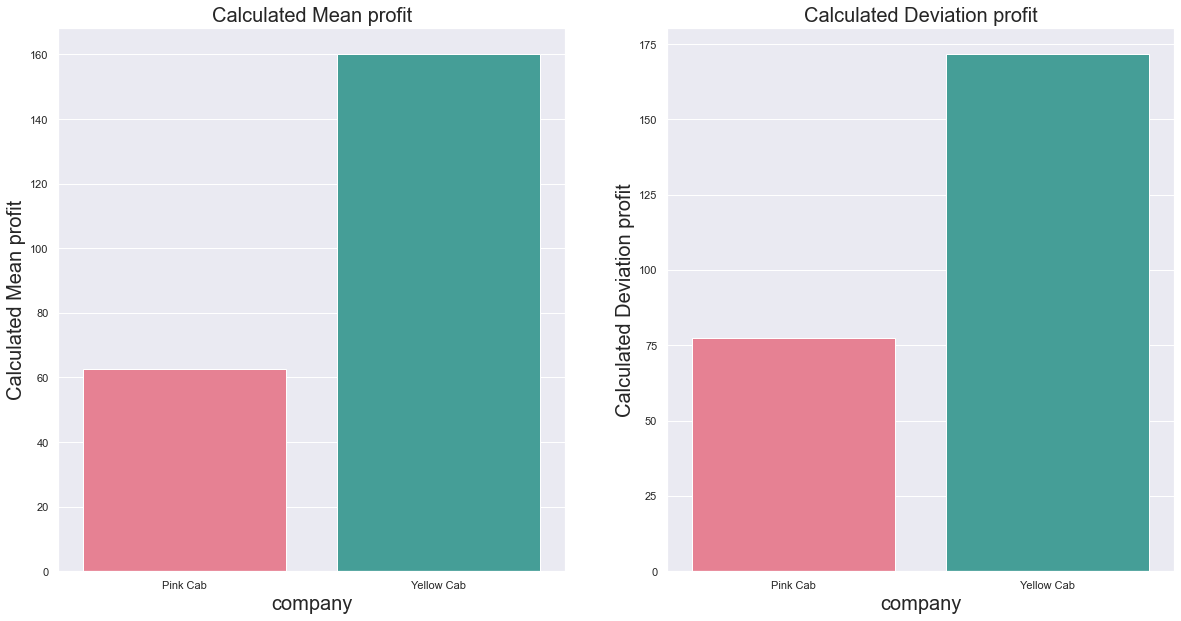

In [305]:
plotting_bar('profit','company') # Plot-10

**Observations from set of Bar Plot one**
- The mean charged price of the Yellow Cab Company is more than the Pink Company which means they charge more than that of Pink Company.
- The price deviation of both companies is quite high which implies that the price charged is not consistent.
- The mean and deviation of kilometers travelled are the same for both companies which means that the Yellow Cab Company is charging more than the other company
- The mean cost of trip is more for the Yellow Cab Company and therefore explains why the mean price charged by the company is higher than that of the Pink Company
- From plot-10, it can be seen that the mean profit of Yellow Cab is more profitable than Pink Cab.

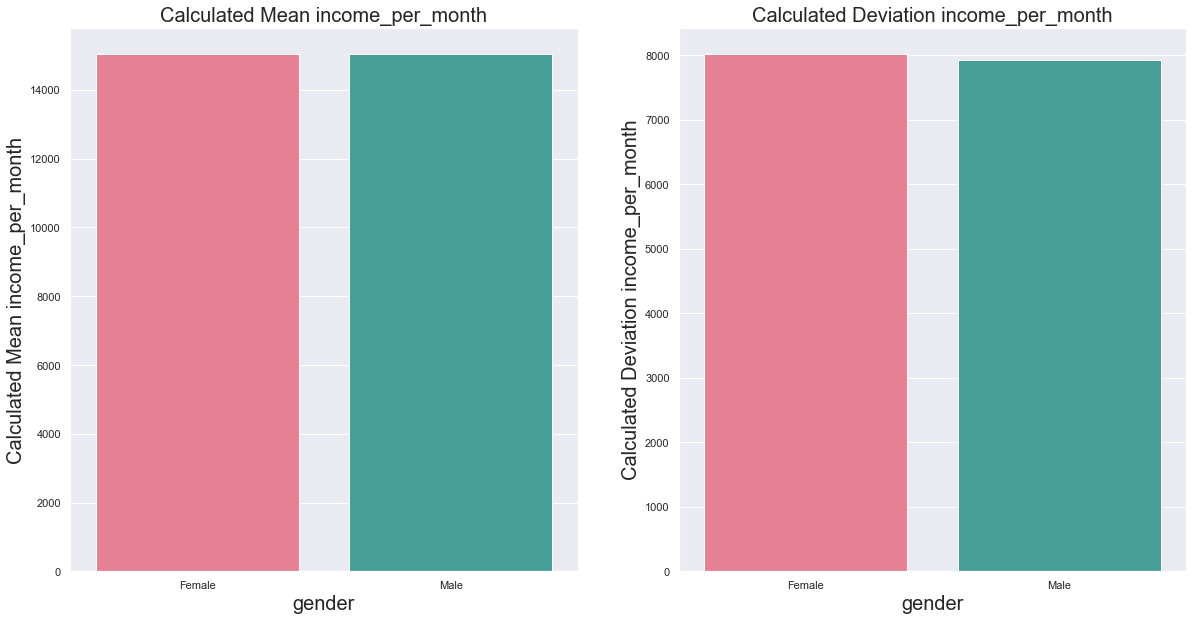

In [296]:
plotting_bar('income_per_month','gender') # Plot-11

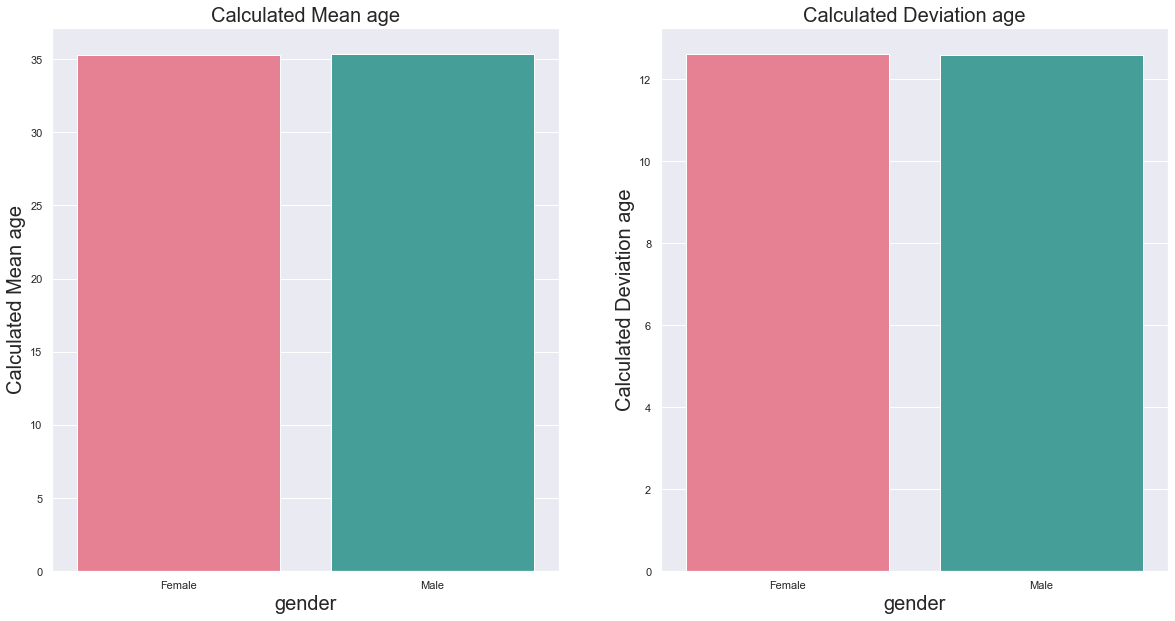

In [298]:
plotting_bar('age','gender') # Plot-12

**Observations from set of Bar Plot two**

- Mean income per month and age is the same for both genders of customers as seen from plots 10 and 11.

In [306]:
df_eda.columns

Index(['customer_id', 'gender', 'age', 'income_per_month', 'transaction_id',
       'company', 'city', 'date_of_travel', 'payment_mode', 'km_travelled',
       'price_charged', 'cost_of_trip', 'profit'],
      dtype='object')

In [307]:
nums = df_eda.select_dtypes(include=np.number)
nums

,customer_id,age,income_per_month,transaction_id,km_travelled,price_charged,cost_of_trip,profit
0,29290,28,10813,10000011,30.453125,371.0000,313.7500,57.250
1,29290,28,10813,10351127,26.187500,598.5000,317.5000,281.000
2,29290,28,10813,10412921,42.562500,792.0000,597.5000,194.500
3,27703,27,9237,10000012,28.625000,358.5000,334.7500,23.750
4,27703,27,9237,10320494,36.375000,721.0000,467.0000,254.000
...,...,...,...,...,...,...,...,...
359387,38520,42,19417,10439790,16.656250,261.2500,213.8750,47.375
359388,12490,33,18713,10439799,13.718750,278.0000,172.8750,105.125
359389,41414,38,3960,10439838,19.000000,303.7500,232.5000,71.250
359390,41677,23,19454,10439840,5.601562,92.4375,70.5625,21.875


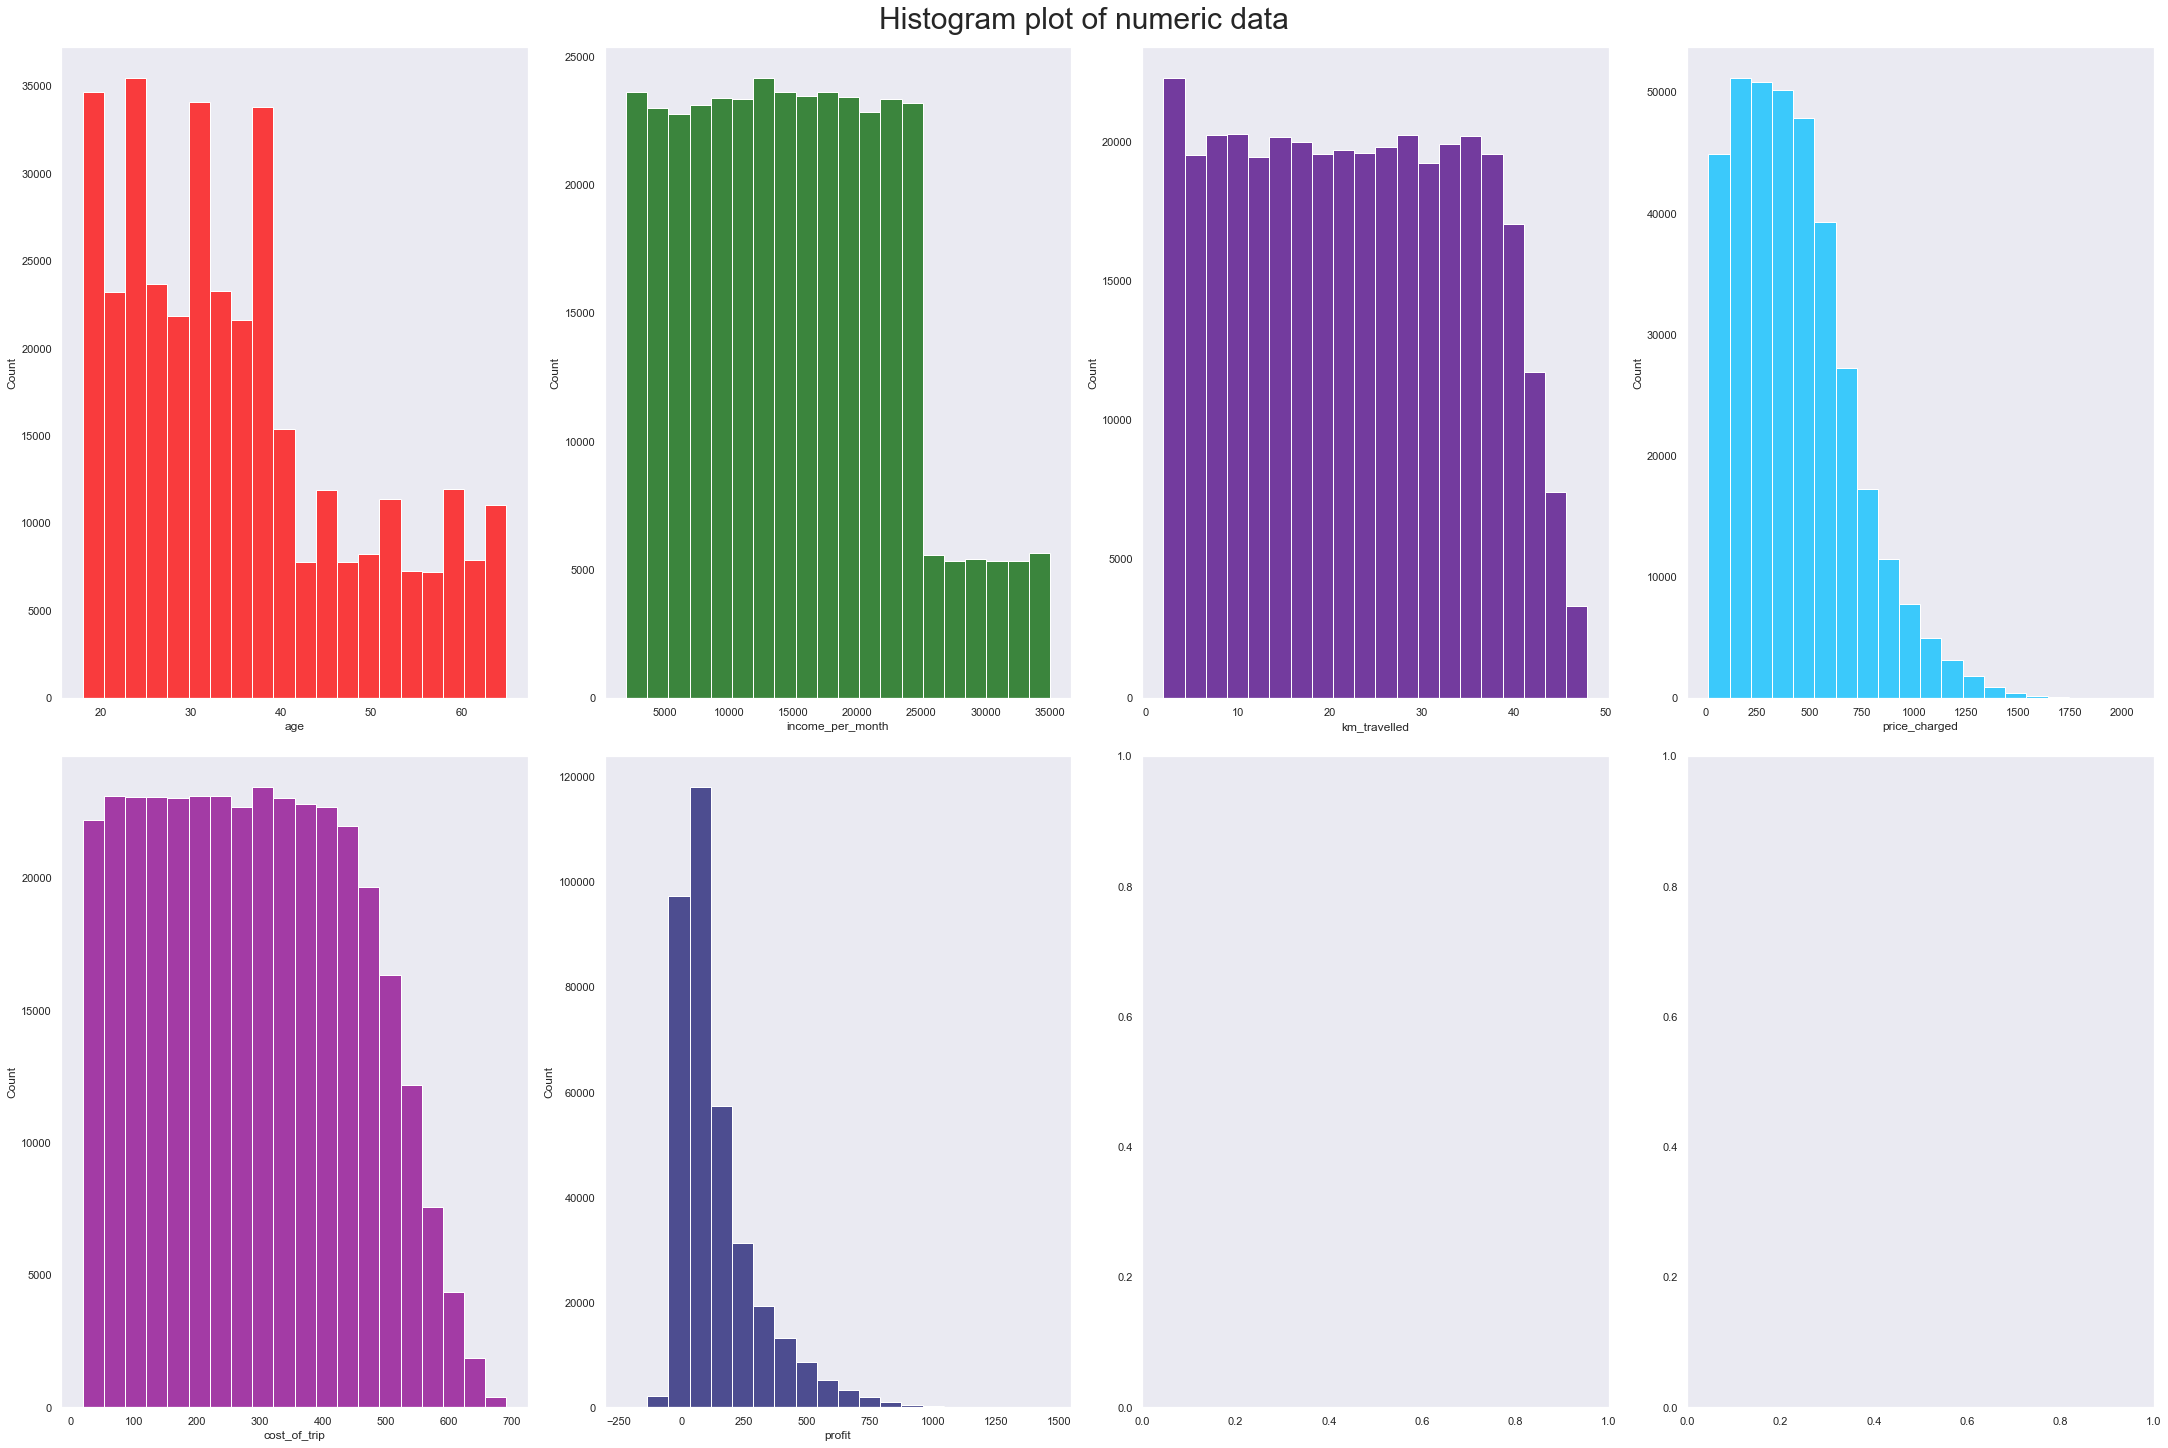

In [321]:
fig, ax = plt.subplots(2,4,figsize=(30,20),constrained_layout=True)
ax = ax.ravel()
colors_list = ['red',
                'darkgreen',
                'indigo','deepskyblue','darkmagenta',
                'midnightblue','crimson','chocolate']

sns.set_theme(style='dark')
for index,value in enumerate(nums.loc[:,~nums.columns.isin(['transaction_id','customer_id'])]):
        sns.histplot(data=nums,x=value,color=colors_list[index],ax=ax[index],bins=20)
        fig.suptitle("Histogram plot of numeric data",fontsize=30)
        

# Plot-13
        

**Observations from Histogram plots**

The following can be seen from plot-13:
- There are some customers whose age is above 40
- There are some customers with a monthly income above $25000 
- Seems to be less orders above 40km
- There is a sharp decline of price charged above $500
- Profit made seems to revolve mostly between $0 and $250  with few profits beyond $250.

In [323]:
objects = df_eda.select_dtypes(include='category')
objects.drop(axis=1,columns='date_of_travel',inplace=True)

In [325]:
objects.columns

Index(['gender', 'company', 'city', 'payment_mode'], dtype='object')

In [336]:
nums.columns.to_list()

['customer_id',
 'age',
 'income_per_month',
 'transaction_id',
 'km_travelled',
 'price_charged',
 'cost_of_trip',
 'profit']

In [340]:
df_eda.company.unique()

['Pink Cab', 'Yellow Cab']
Categories (2, object): ['Pink Cab', 'Yellow Cab']

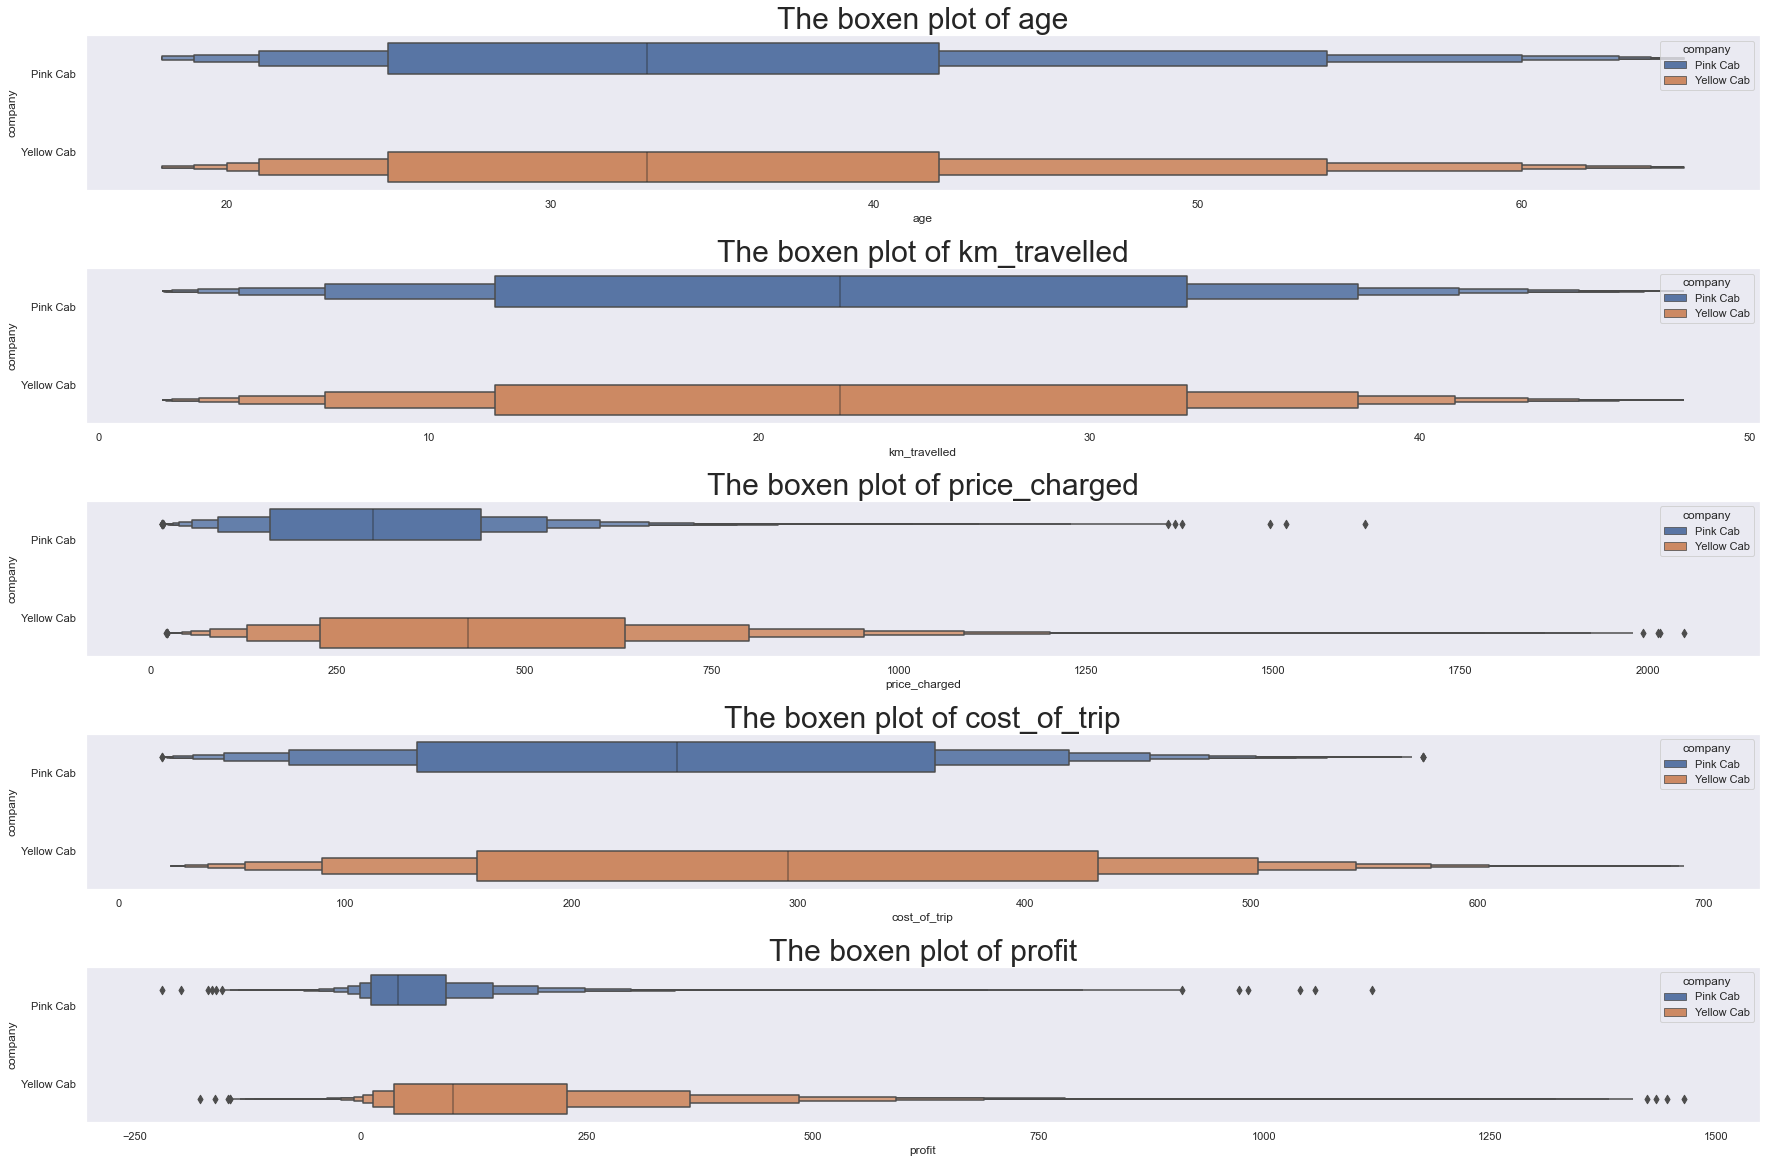

In [346]:
fig,ax = plt.subplots(5, figsize=(30,20))
x_values = ['age','km_travelled','price_charged','cost_of_trip','profit']
for index,value in enumerate(x_values):
    sns.boxenplot(data=df_eda,y='company',x=value,hue='company',ax=ax[index])
    ax[index].set_title(f'The boxen plot of {value}',fontsize=30)
    plt.subplots_adjust(hspace=0.5)
    # Plot-14

**Observations from Boxen plots**

The following can be observed from the boxenplot:
- Age and kilometers driven care the same for both comapnies.
- The price charged by Yellow Cab company is considerably higher than the other company.
- The cost of trip by Yellow Cab company is considerably higher than the other company.
- The profit of Yellow Cab company is considerably higher than the other company.
- Both companies experience some form of loss but that of Pink Cab company is higher in loss as seen in the outliers.

<AxesSubplot:>

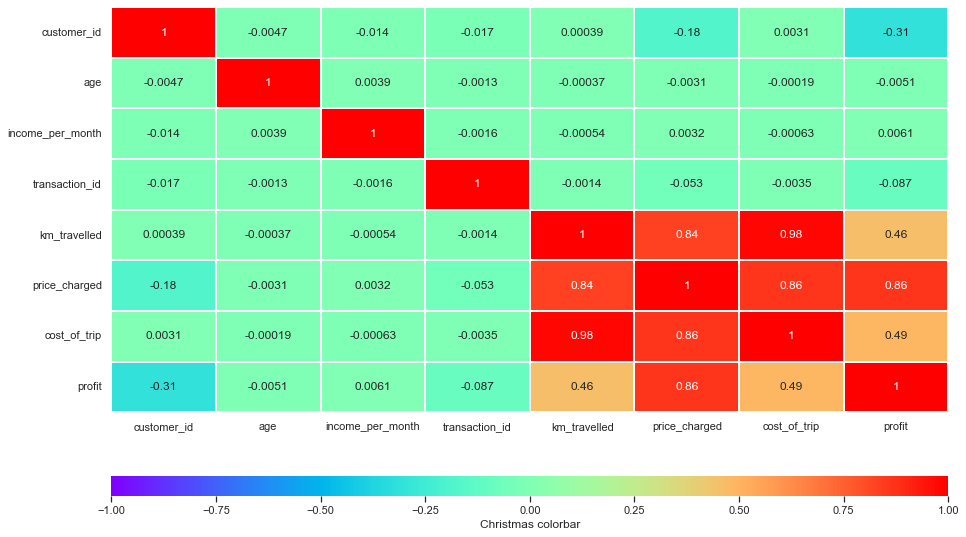

In [349]:
sns.set_theme()
grid_kws = {"height_ratios": (1,.05),"hspace":.3}
fig,(ax, cbar_ax) =plt.subplots(2,figsize=(15, 9),gridspec_kw=grid_kws)
sns.heatmap(df_eda.corr(),
            ax=ax,
            cbar_ax=cbar_ax,
            cmap="rainbow",
            annot=True,
            vmin=-1,
            vmax=1,
            cbar_kws={"orientation":"horizontal",'label':"Christmas colorbar"},
            linewidths=1
            )

# Plot-15

**Observations from heat map plots**

The following can be seen from the heat map:
- There is a positive correlation between km_travelled and price_charged 
- There is a high positive correlation between km_travelled and cost_of_trip 
- The positive correlation between km_travelled and profit is quite small
- There is a positive correlation between price_charged and cost_of_trip
- There is a high positive correlation between price_charged and profit
- The positive correlation between cost_of_trip and profit is quite small

In [383]:
def line_plots(x:str,y:str):
    try:
        sns.set_theme(style='darkgrid',palette='husl')
        fig,ax = plt.subplots(figsize=(20,10))
        sns.lineplot(data=df_eda,x=x,y=y,hue='company')
        ax.set_title(f'Line plot of {x} vs {y}',fontsize=14)
    except ValueError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        nums.info(memory_usage='deep')

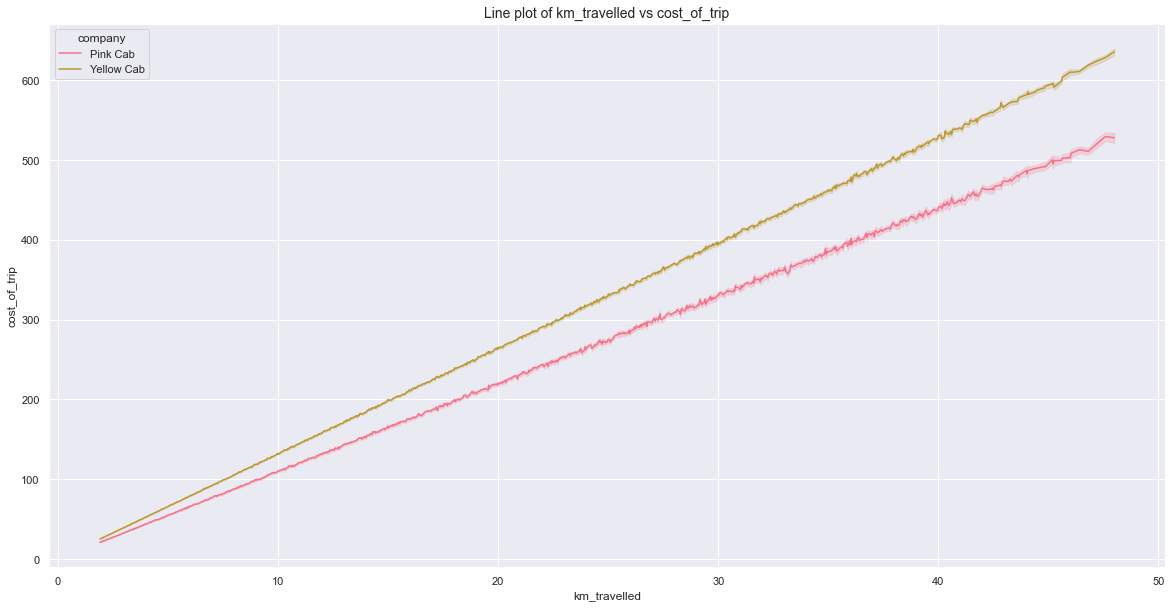

In [384]:
line_plots('km_travelled','cost_of_trip') # Plot-16

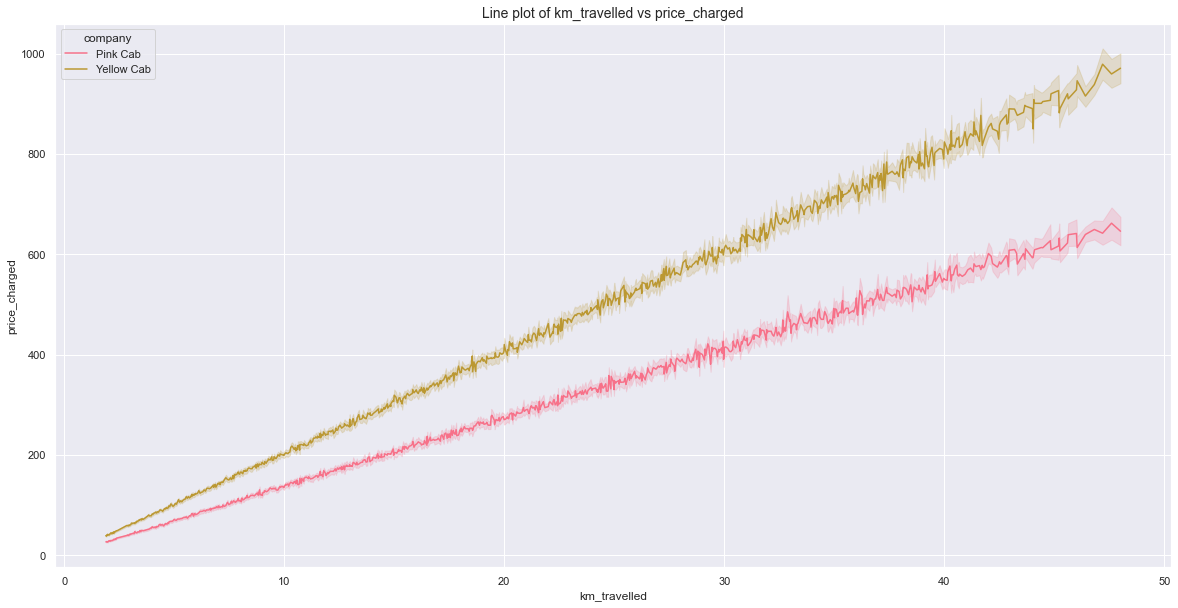

In [385]:
line_plots('km_travelled','price_charged') # Plot-17

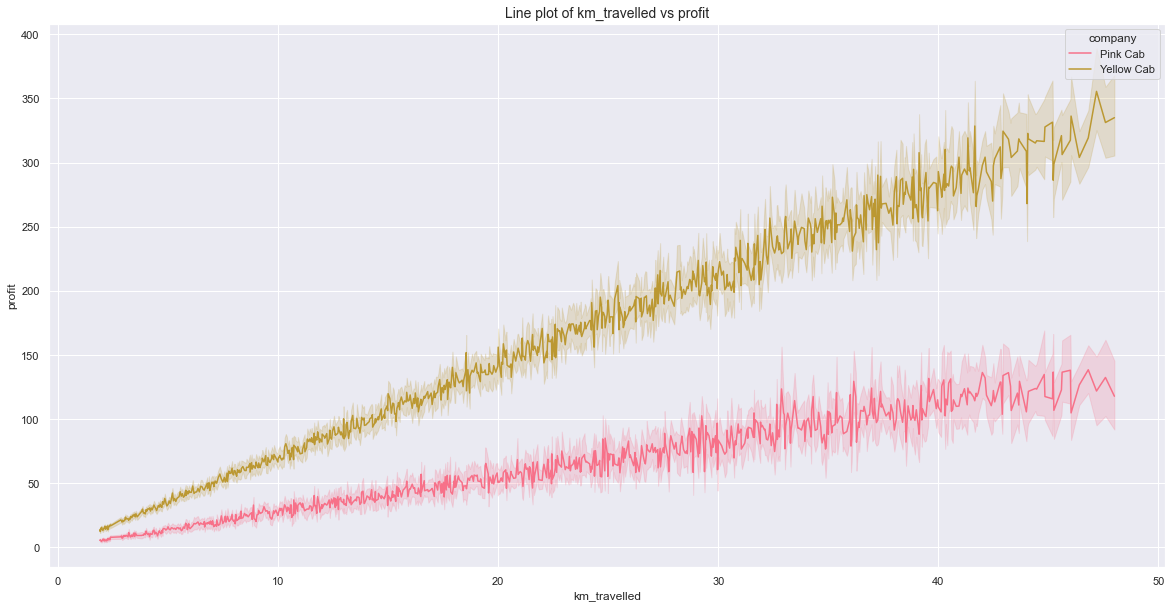

In [386]:
line_plots('km_travelled','profit') # Plot-18

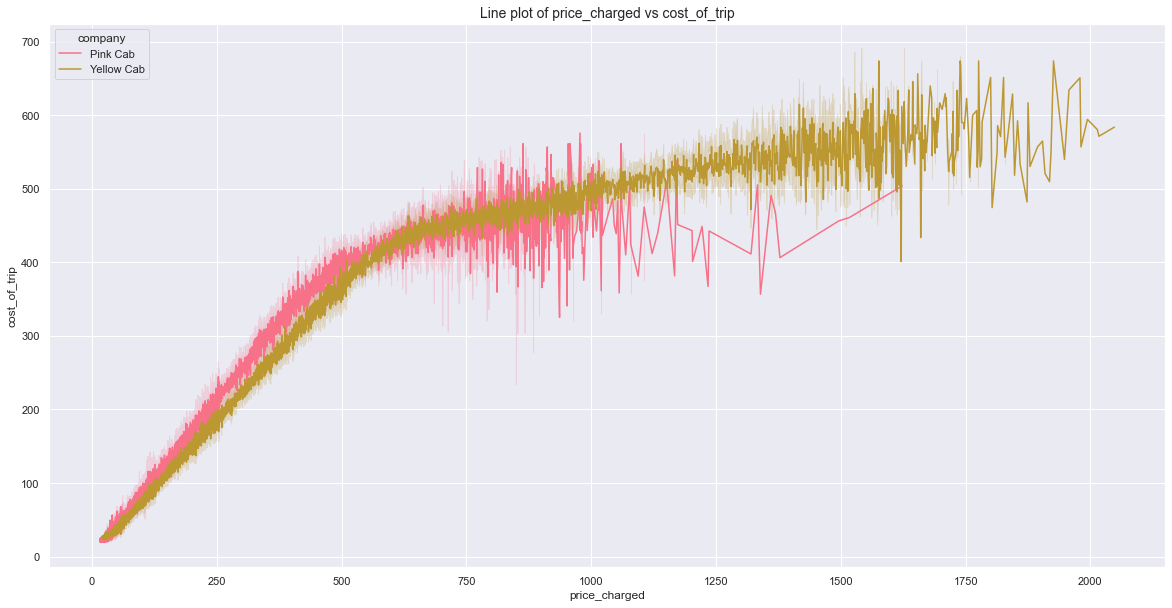

In [387]:
line_plots('price_charged','cost_of_trip') # Plot-19

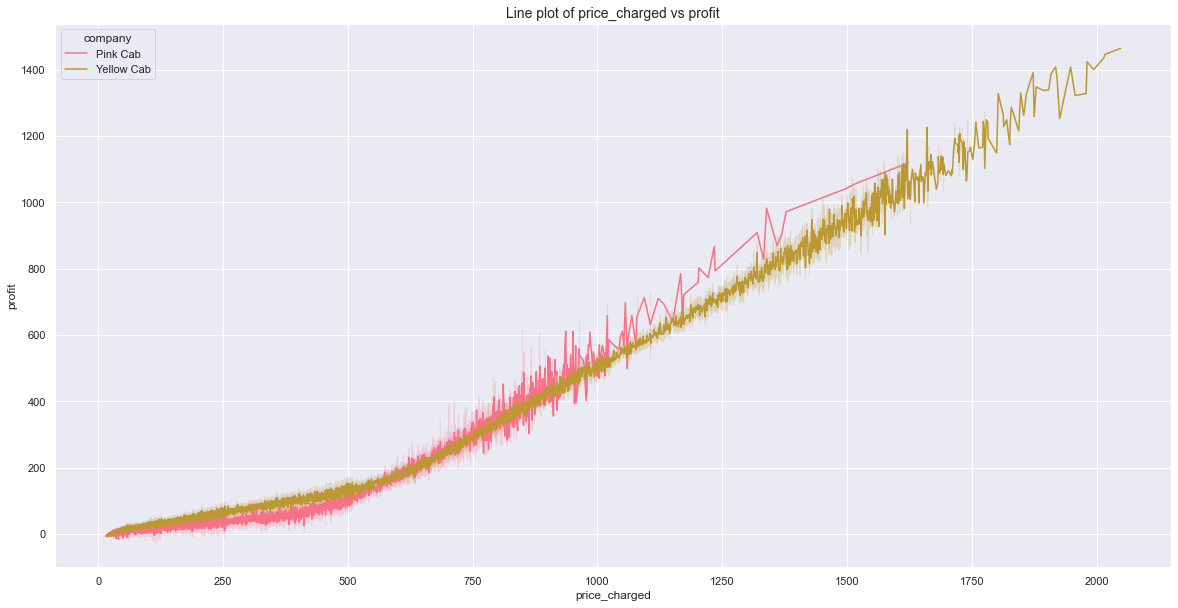

In [388]:
line_plots('price_charged','profit') # Plot-20

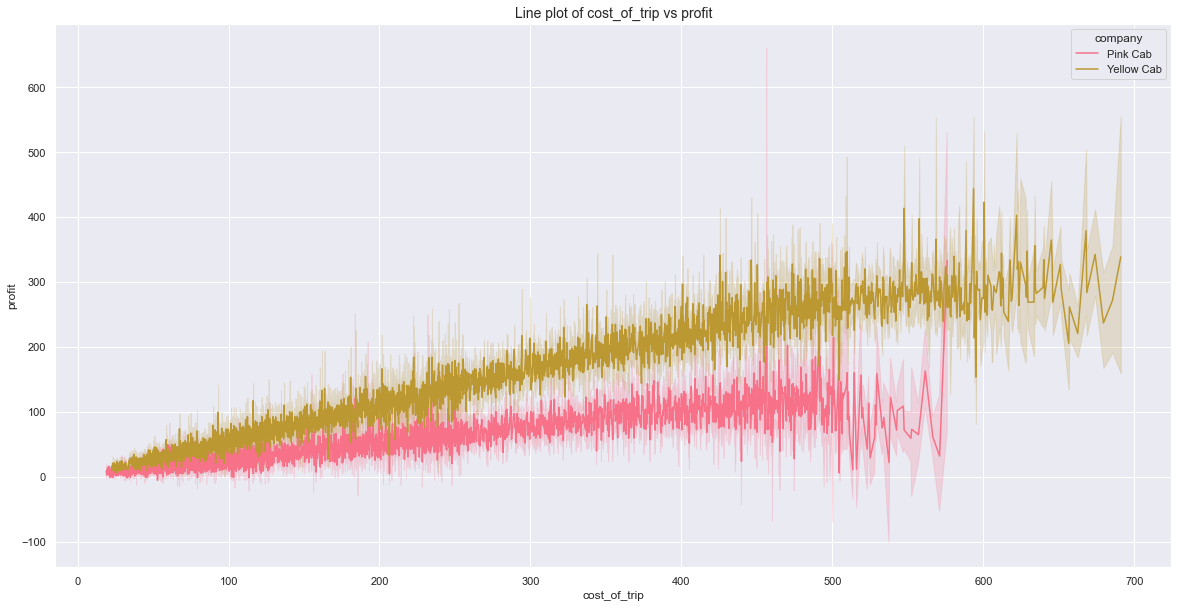

In [389]:
line_plots('cost_of_trip','profit') # Plot-21

**Observations from line plots**

The following can be seen from the line plots:
- Plot-18 shows that Pink Cab company has a low profit compared to that of Yellow Cab company.
- Plots 16-21 all confirms the heat map's relationship between the respective values

### Performing EDA with Date Time

In [390]:
date_eda = df_eda
date_eda.head()

,customer_id,gender,age,income_per_month,transaction_id,company,city,date_of_travel,payment_mode,km_travelled,price_charged,cost_of_trip,profit
0,29290,Male,28,10813,10000011,Pink Cab,ATLANTA GA,2016-01-08,Card,30.453125,371.0,313.75,57.25
1,29290,Male,28,10813,10351127,Yellow Cab,ATLANTA GA,2018-07-21,Cash,26.187500,598.5,317.50,281.00
2,29290,Male,28,10813,10412921,Yellow Cab,ATLANTA GA,2018-11-23,Card,42.562500,792.0,597.50,194.50
3,27703,Male,27,9237,10000012,Pink Cab,ATLANTA GA,2016-01-06,Card,28.625000,358.5,334.75,23.75
4,27703,Male,27,9237,10320494,Yellow Cab,ATLANTA GA,2018-04-21,Card,36.375000,721.0,467.00,254.00


In [392]:
date_eda['date_of_travel'] = pd.to_datetime(date_eda['date_of_travel']) # converting dataes to readable format
date_eda.date_of_travel.head()

0   2016-01-08
1   2018-07-21
2   2018-11-23
3   2016-01-06
4   2018-04-21
Name: date_of_travel, dtype: datetime64[ns]

In [402]:
year_group = date_eda.groupby(pd.Grouper(key='date_of_travel',freq='1Y'))['profit'].mean().to_frame().reset_index()
year_group

,date_of_travel,profit
0,2016-12-31,145.75
1,2017-12-31,144.75
2,2018-12-31,122.00


Text(0.5, 0.98, 'Profit Average by Year')

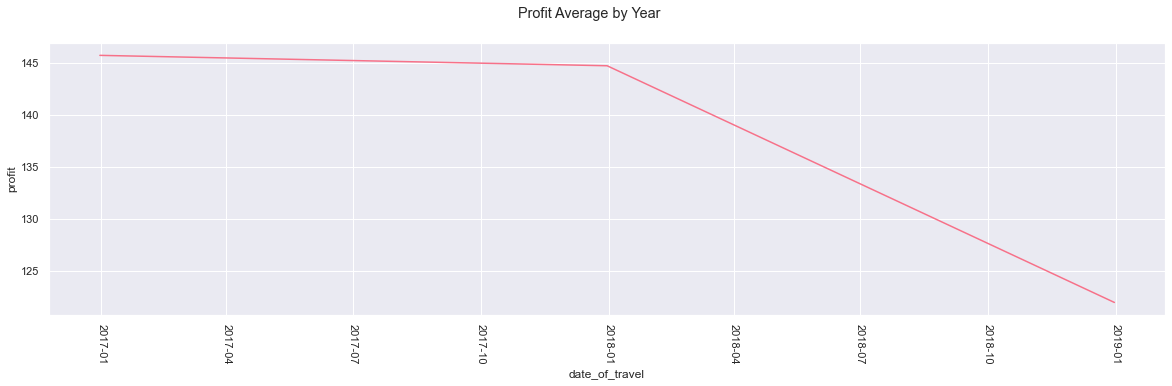

In [403]:
fig, ax = plt.subplots(figsize=(20,5))
sns.set_theme(style="darkgrid")

sns.lineplot(data=year_group,
            x='date_of_travel',
            y='profit')

ax.tick_params(axis="x",rotation=-90)
fig.suptitle("Profit Average by Year", fontdict={'fontsize':30})

# Plot-22

In [418]:
month_group = date_eda.groupby(pd.Grouper(key='date_of_travel',freq='M'))['profit'].mean().to_frame().reset_index()
month_group.head(10)

,date_of_travel,profit
0,2016-01-31,195.8750
1,2016-02-29,191.6250
2,2016-03-31,157.2500
3,2016-04-30,155.8750
4,2016-05-31,178.3750
5,2016-06-30,178.7500
6,2016-07-31,126.5000
7,2016-08-31,106.8125
8,2016-09-30,133.5000
9,2016-10-31,123.8125


Text(0.5, 0.98, 'Profit Average by Month')

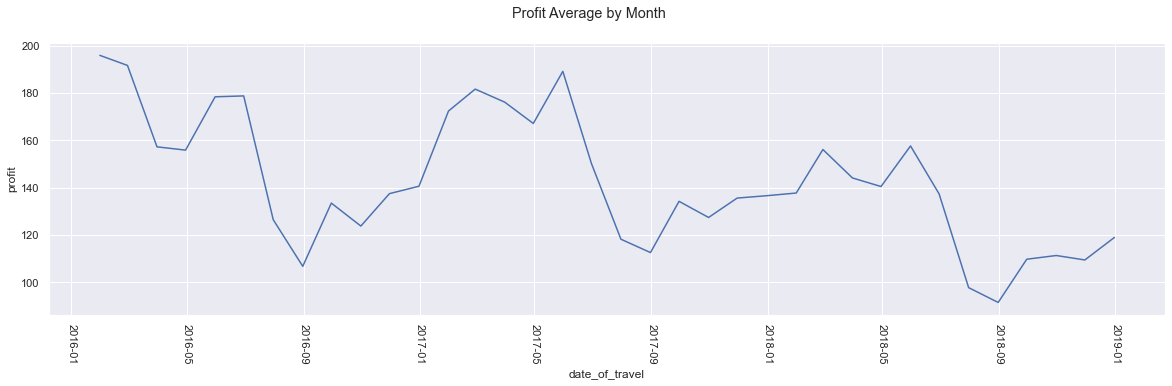

In [406]:
fig, ax = plt.subplots(figsize=(20,5))
sns.set_theme(style="darkgrid")

sns.lineplot(data=month_group,
            x='date_of_travel',
            y='profit')

ax.tick_params(axis="x",rotation=-90)
fig.suptitle("Profit Average by Month", fontdict={'fontsize':30})

# Plot-23

In [417]:
quarter_group = date_eda.groupby(pd.Grouper(key='date_of_travel',freq='Q'))['profit'].mean().to_frame().reset_index()
quarter_group.head(20)

,date_of_travel,profit
0,2016-03-31,179.7500
1,2016-06-30,171.6250
2,2016-09-30,122.9375
3,2016-12-31,134.1250
4,2017-03-31,176.3750
5,2017-06-30,168.5000
6,2017-09-30,122.6875
7,2017-12-31,133.3750
8,2018-03-31,144.3750
9,2018-06-30,145.1250


Text(0.5, 0.98, 'Profit Average by Quarters')

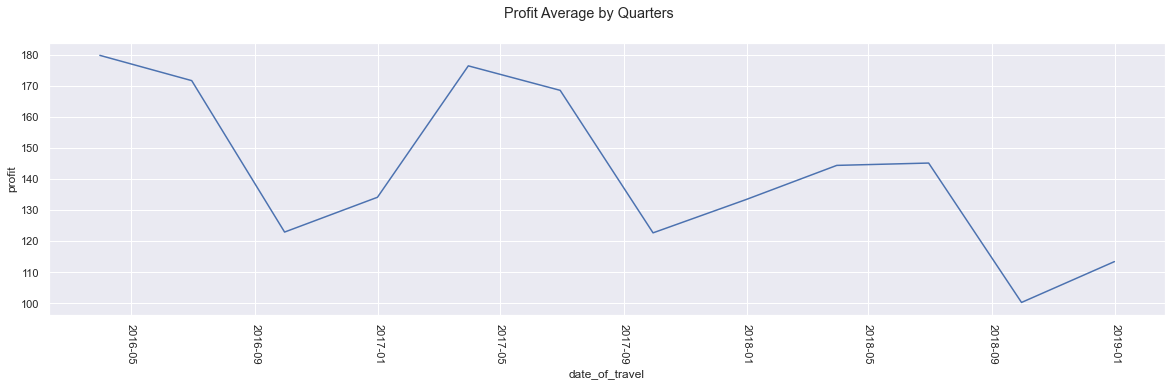

In [414]:
fig, ax = plt.subplots(figsize=(20,5))
sns.set_theme(style="darkgrid")

sns.lineplot(data=quarter_group,
            x='date_of_travel',
            y='profit')

ax.tick_params(axis="x",rotation=-90)
fig.suptitle("Profit Average by Quarters", fontdict={'fontsize':30})

# Plot-24

In [411]:
week_group = date_eda.groupby(pd.Grouper(key='date_of_travel',freq='W'))['profit'].mean().to_frame().reset_index()
week_group.head()

,date_of_travel,profit
0,2016-01-03,276.250
1,2016-01-10,211.000
2,2016-01-17,186.250
3,2016-01-24,164.375
4,2016-01-31,197.125


Text(0.5, 0.98, 'Profit Average by Week')

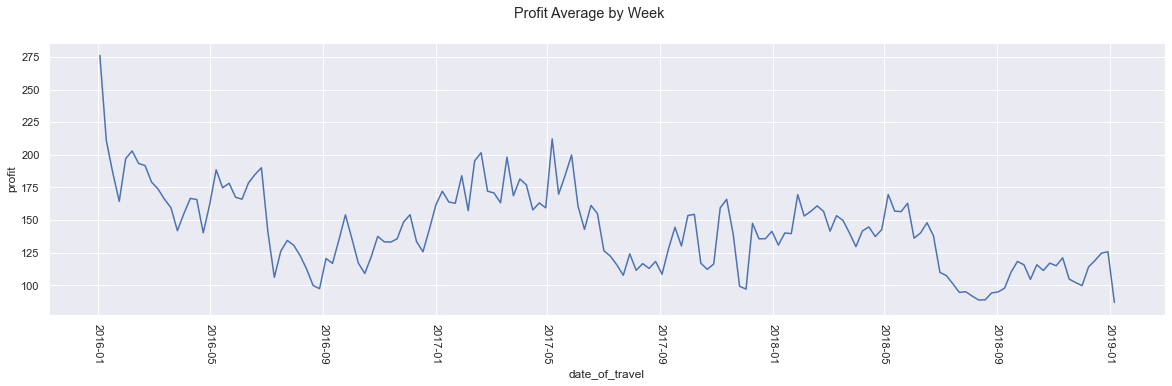

In [412]:
fig, ax = plt.subplots(figsize=(20,5))
sns.set_theme(style="darkgrid")

sns.lineplot(data=week_group,
            x='date_of_travel',
            y='profit')

ax.tick_params(axis="x",rotation=-90)
fig.suptitle("Profit Average by Week", fontdict={'fontsize':30})

# Plot-25

In [419]:
day_group = date_eda.groupby(pd.Grouper(key='date_of_travel',freq='D'))['profit'].mean().to_frame().reset_index()
day_group.head()

,date_of_travel,profit
0,2016-01-02,276.750
1,2016-01-03,275.750
2,2016-01-04,163.125
3,2016-01-05,257.000
4,2016-01-06,192.625


Text(0.5, 0.98, 'Profit Average by Day')

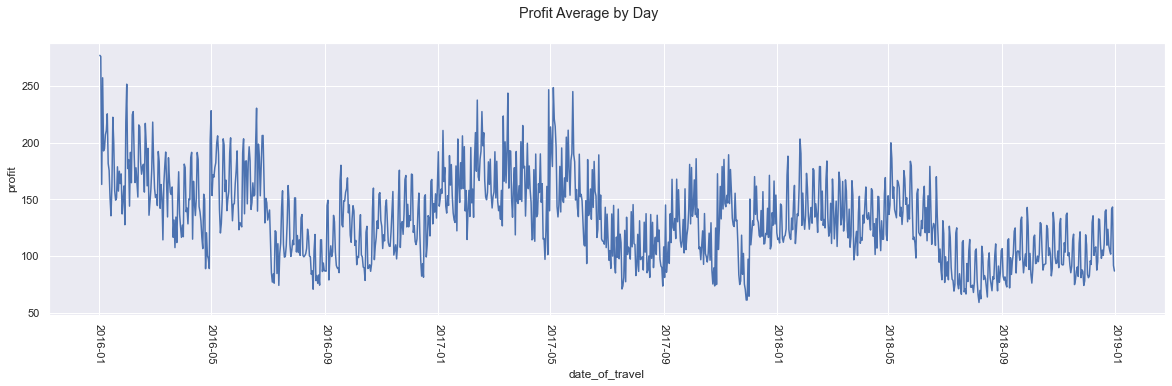

In [420]:
fig, ax = plt.subplots(figsize=(20,5))
sns.set_theme(style="darkgrid")

sns.lineplot(data=day_group,
            x='date_of_travel',
            y='profit')

ax.tick_params(axis="x",rotation=-90)
fig.suptitle("Profit Average by Day", fontdict={'fontsize':30})

# Plot-25

**Observations from date plots**
- Profit average by year we can see a sharp decline from 2016 - 2018.
- We can see a decline of profit in the month of September for all years in profit average by month.
- We can see a decline of profit at the end of the 3rd quarter for all years in profit average by quarter.

In [429]:
date_eda['year'] = date_eda.date_of_travel.dt.year
date_eda['month'] = date_eda.date_of_travel.dt.month

In [433]:
new_oder = ['customer_id', 'gender', 'age', 'income_per_month', 'transaction_id',
       'company', 'city', 'date_of_travel','year','month', 'payment_mode', 'km_travelled',
       'price_charged', 'cost_of_trip', 'profit']

In [435]:
date_eda = date_eda[new_oder]
date_eda.head()

,customer_id,gender,age,income_per_month,transaction_id,company,city,date_of_travel,year,month,payment_mode,km_travelled,price_charged,cost_of_trip,profit
0,29290,Male,28,10813,10000011,Pink Cab,ATLANTA GA,2016-01-08,2016,1,Card,30.453125,371.0,313.75,57.25
1,29290,Male,28,10813,10351127,Yellow Cab,ATLANTA GA,2018-07-21,2018,7,Cash,26.187500,598.5,317.50,281.00
2,29290,Male,28,10813,10412921,Yellow Cab,ATLANTA GA,2018-11-23,2018,11,Card,42.562500,792.0,597.50,194.50
3,27703,Male,27,9237,10000012,Pink Cab,ATLANTA GA,2016-01-06,2016,1,Card,28.625000,358.5,334.75,23.75
4,27703,Male,27,9237,10320494,Yellow Cab,ATLANTA GA,2018-04-21,2018,4,Card,36.375000,721.0,467.00,254.00


In [445]:
year_count = date_eda.year.value_counts().to_frame()
# year_count

Text(0.5, 1.0, 'Total number of transactions for each Year')

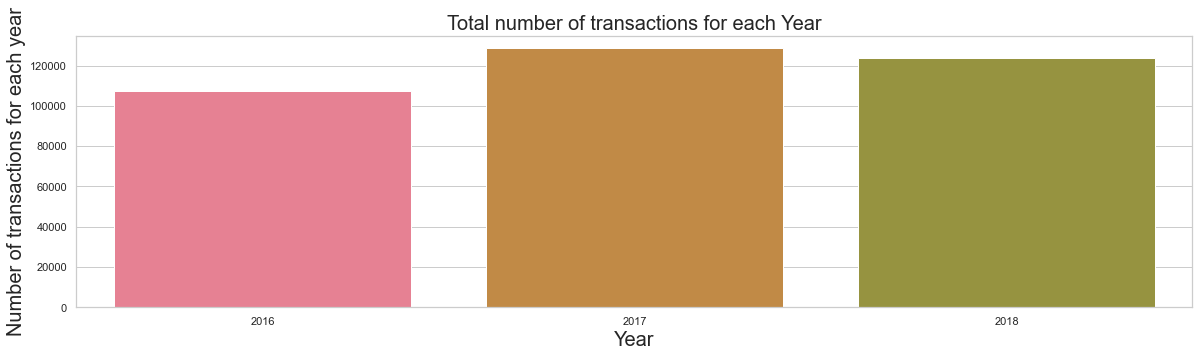

In [453]:
fig, ax = plt.subplots(figsize=(20,5))
sns.set_theme(style="whitegrid")


my_palette = sns.color_palette("husl", 9)
sns.barplot(data=year_count, 
            y='year',
            x=year_count.index,
            palette=my_palette)

ax.set_xlabel("Year", fontdict={'fontsize':20})
ax.set_ylabel("Number of transactions for each year", fontdict={'fontsize':20})

ax.set_title("Total number of transactions for each Year", fontdict={'fontsize':20})

# Plot-26

In [444]:
month_count = date_eda.month.value_counts().to_frame()

Text(0.5, 1.0, 'Total number of transactions for each month across the years')

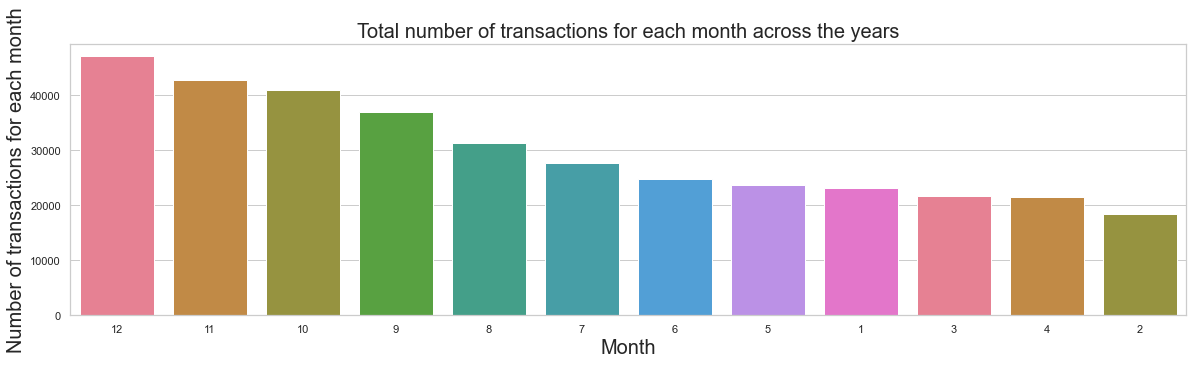

In [455]:
fig, ax = plt.subplots(figsize=(20,5))
sns.set_theme(style="whitegrid")

my_palette = sns.color_palette("husl", 9)
sns.barplot(data=month_count, 
            order=month_count.sort_values(by=["month"]).index[::-1],
            y='month',
            x=month_count.index,
            palette=my_palette)
            
ax.set_xlabel("Month", fontdict={'fontsize':20})
ax.set_ylabel("Number of transactions for each month", fontdict={'fontsize':20})

ax.set_title("Total number of transactions for each month across the years", fontdict={'fontsize':20})

# Plot-27

**Observations from the two above barplots**
- Although there are more transactions in the year of 2017, the profit of 2016 is slightly better than 2017 and overwhelmly better than that of 2018 which has more transactions than it.
- We can that the the top five months for transactions are Decemeber, November, October, September & August.
- We can see that there is more profit to be made in the month June even though there are less transactions and below 30,000.

In [537]:
def plotting_bar_date(x:str,group:str):
    try:
        grouped_agg = date_eda.groupby(group)[x].value_counts().to_frame('total_counts').reset_index()
        fig,ax = plt.subplots(1, figsize=(20,10))

        colors = [
            'purple','green',
            'blue','pink',
            'brown','red',
            'yellow','orange',
            'teal','purple',
            'tan','aqua',
                ]
        my_palette = sns.xkcd_palette(colors)
        sns.set_theme(style="darkgrid")
        sns.barplot(data=grouped_agg, x=group, y=f'total_counts', palette=my_palette,hue=x)


        ax.set_title(f'Total number of transactions for each company in a {x}',fontsize=30)
        ax.set_xlabel(f"{group}", fontdict={'fontsize':20})
        ax.set_ylabel(f"total_counts in {x}", fontdict={'fontsize':20})
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            df_eda.info(memory_usage='deep')

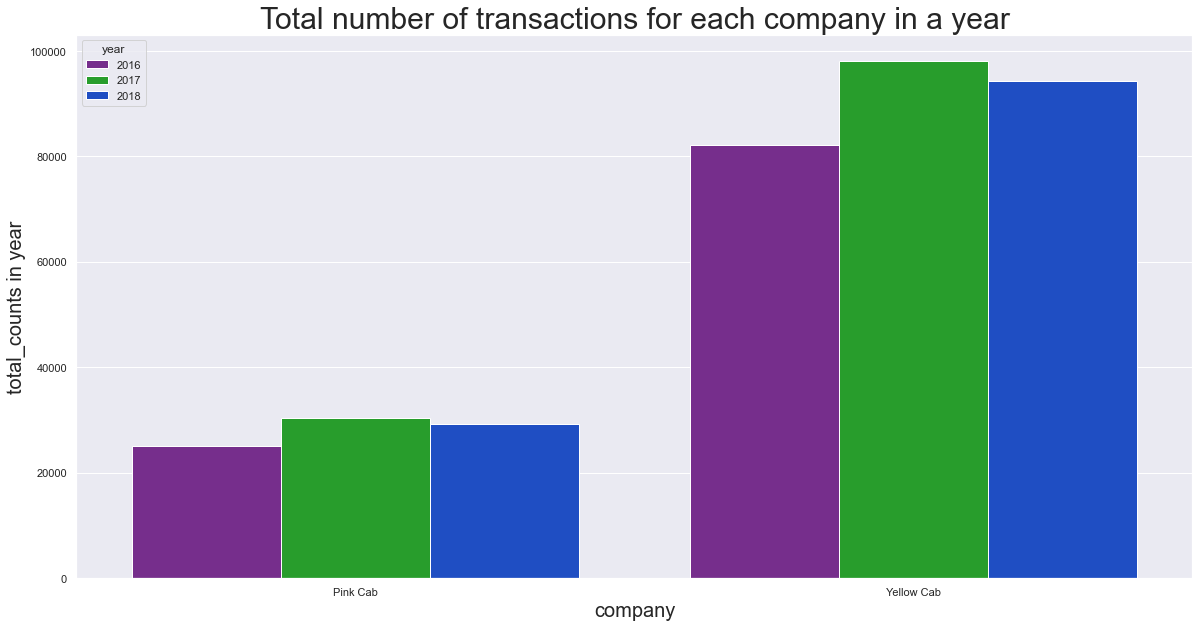

In [538]:
plotting_bar_date(group='company',x='year') # Plot-28

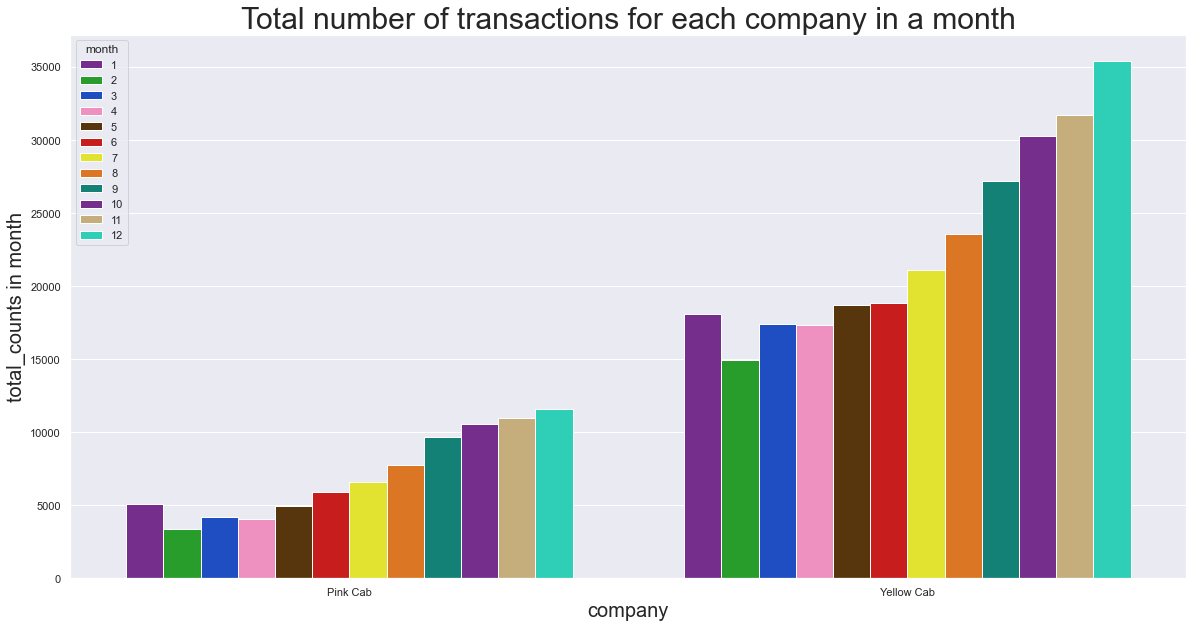

In [539]:
plotting_bar_date(group='company',x='month') # Plot-29

**Observations from the two above barplots**
- It is obvious that the Yellow Cab company has more transactions than that of the Pink Cab comapny in both years and months

In [541]:
def plotting_bar_date_two(x:str,group:list):
    try:
        grouped_agg = date_eda.groupby(group)[x].mean().to_frame('profit').reset_index()
        fig,ax = plt.subplots(1, figsize=(20,10))

        colors = [
            'purple','green',
            'blue','pink',
            'brown','red',
            'yellow','orange',
            'teal','purple',
            'tan','aqua',
        ]
        my_palette = sns.xkcd_palette(colors)
        sns.set_theme(style="darkgrid")
        sns.barplot(data=grouped_agg, x=group[0], y=x, palette=my_palette,hue=group[1])


        ax.set_title(f'Mean profit for each company in a {group[1]}',fontsize=30)
        ax.set_xlabel(f"{group[0]}", fontdict={'fontsize':20})
        ax.set_ylabel(f"Total {x}", fontdict={'fontsize':20})
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            df_eda.info(memory_usage='deep')

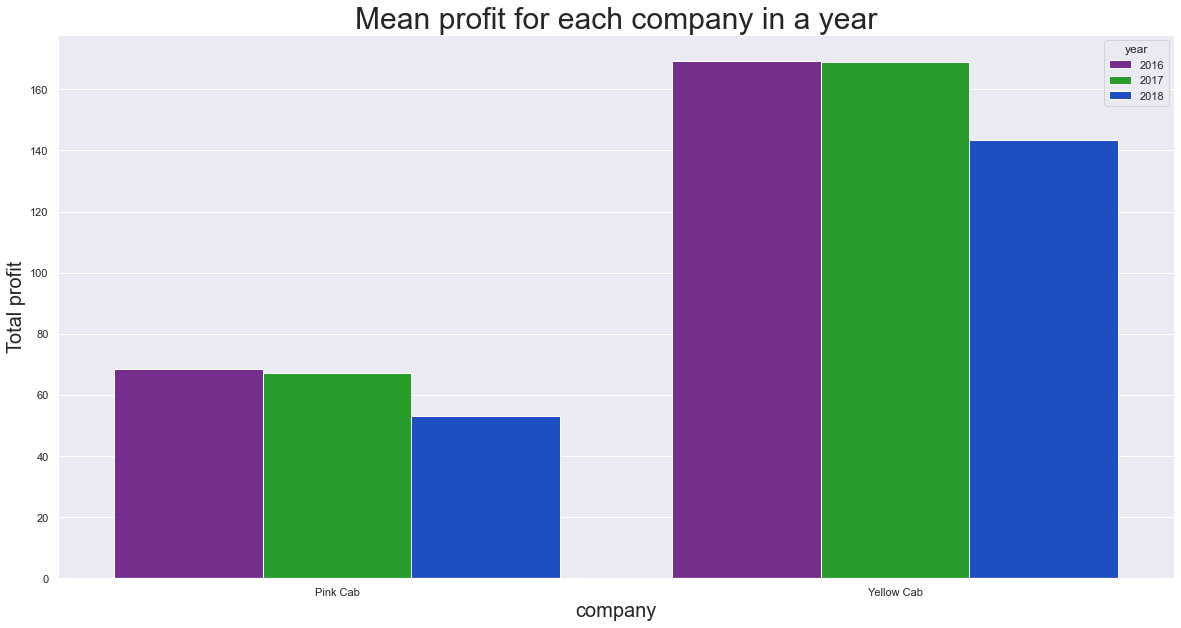

In [542]:
plotting_bar_date_two(x='profit',group=['company','year']) # Plot-30

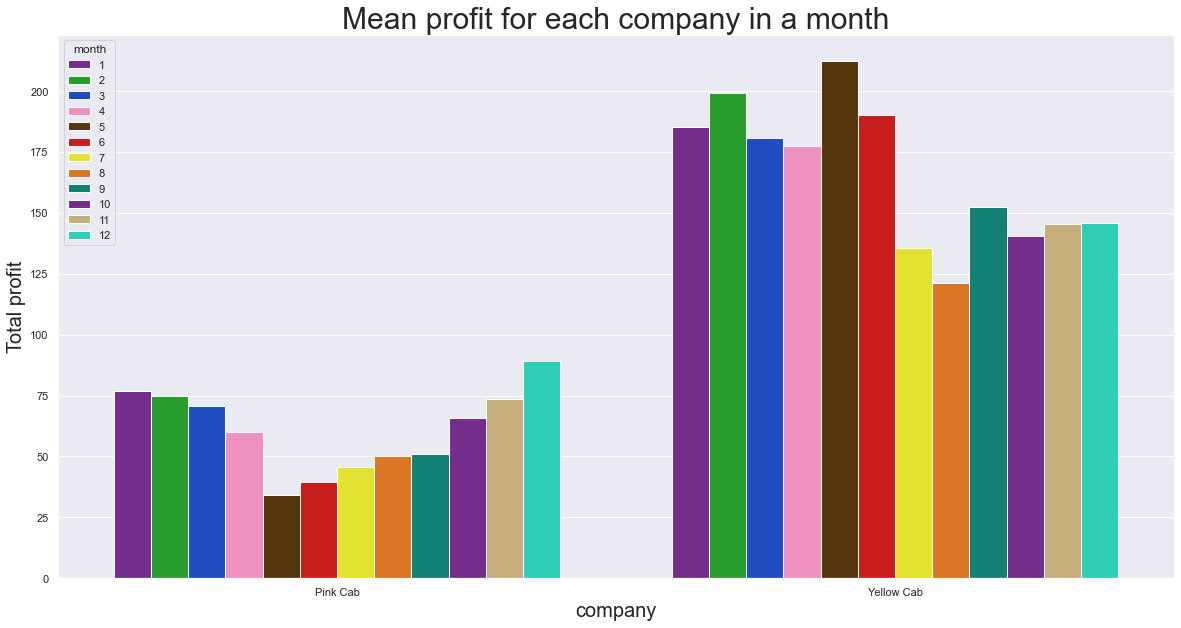

In [543]:
plotting_bar_date_two(x='profit',group=['company','month']) # Plot-31

**Observations from the two above barplots**
- It is obvious that the Yellow Cab company mean profit is more profitable than that of the Pink Cab comapny in both years and months.

### Looking into City Data

In [624]:
import string

In [625]:
df_city_data2 = df_city_data

In [626]:
df_city_data2.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [627]:
# Using a list Comprehension
cleaned_population = [i.translate(str.maketrans('', '', string.punctuation)) for i in df_city_data2.Population]
cleaned_users = [i.translate(str.maketrans('', '', string.punctuation)) for i in df_city_data2.Users]
df_city_data2['population'] = pd.DataFrame(cleaned_population)
df_city_data2['users'] = pd.DataFrame(cleaned_users)
df_city_data2.head(5)

,City,Population,Users,population,users
0,NEW YORK NY,"8,405,837","302,149",8405837,302149
1,CHICAGO IL,"1,955,130","164,468",1955130,164468
2,LOS ANGELES CA,"1,595,037","144,132",1595037,144132
3,MIAMI FL,"1,339,155","17,675",1339155,17675
4,SILICON VALLEY,"1,177,609","27,247",1177609,27247


In [628]:
df_city_data2.dtypes

City          object
Population    object
Users         object
population    object
users         object
dtype: object

In [630]:
df_city_data2.population = df_city_data2.population.astype(int) # Type casting
df_city_data2.users = df_city_data2.users.astype(int) # Type casting
df_city_data2.dtypes

City          object
Population    object
Users         object
population     int32
users          int32
dtype: object

In [631]:
df_city_data2.drop(columns=['Users','Population'],inplace=True)

In [632]:
df_city_data2.head()

,City,population,users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


Text(0, 0.5, 'Users')

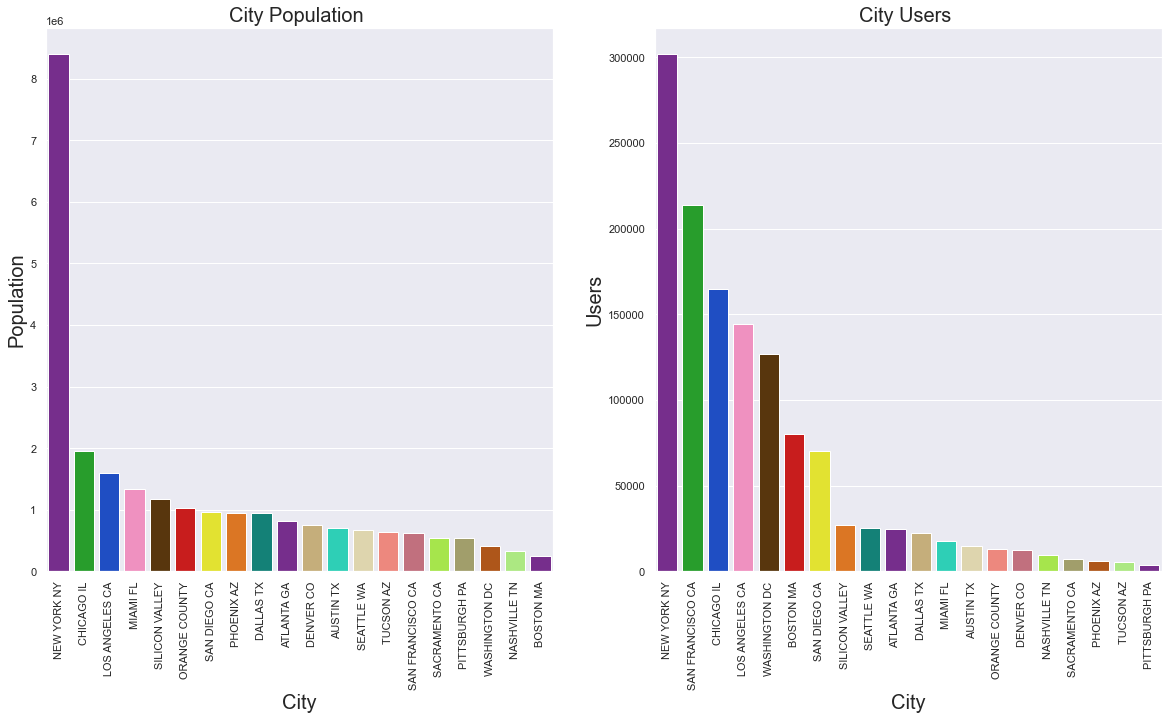

In [633]:
fig,ax = plt.subplots(1,2, figsize=(20,10))

colors = [
            'purple','green',
            'blue','pink',
            'brown','red',
            'yellow','orange',
            'teal','purple',
            'tan','aqua',
            'beige','salmon',
            'rose','lime',
            'khaki','dark orange',
            'spring green'
        ]

order=month_count.sort_values(by=["month"]).index[::-1],
my_palette = sns.xkcd_palette(colors)
sns.set_theme(style="darkgrid")
sns.barplot(data=df_city_data2, 
            y='population',
            ax=ax[0], 
            order=df_city_data2.sort_values('population',ascending=False).City,
            x='City', palette=my_palette) # Plot-32

sns.barplot(data=df_city_data2, 
            y='users',
            order=df_city_data2.sort_values('users',ascending=False).City,
            ax=ax[1], x='City',palette=my_palette) # Plot-33

ax[0].tick_params(axis='x', rotation=90)
ax[0].set_title(f'City Population ',fontsize=20)
ax[0].set_xlabel(f"City", fontdict={'fontsize':20})
ax[0].set_ylabel(f"Population", fontdict={'fontsize':20})

ax[1].tick_params(axis='x', rotation=90)
ax[1].set_title(f'City Users ',fontsize=20)
ax[1].set_xlabel(f"City", fontdict={'fontsize':20})
ax[1].set_ylabel(f"Users", fontdict={'fontsize':20})

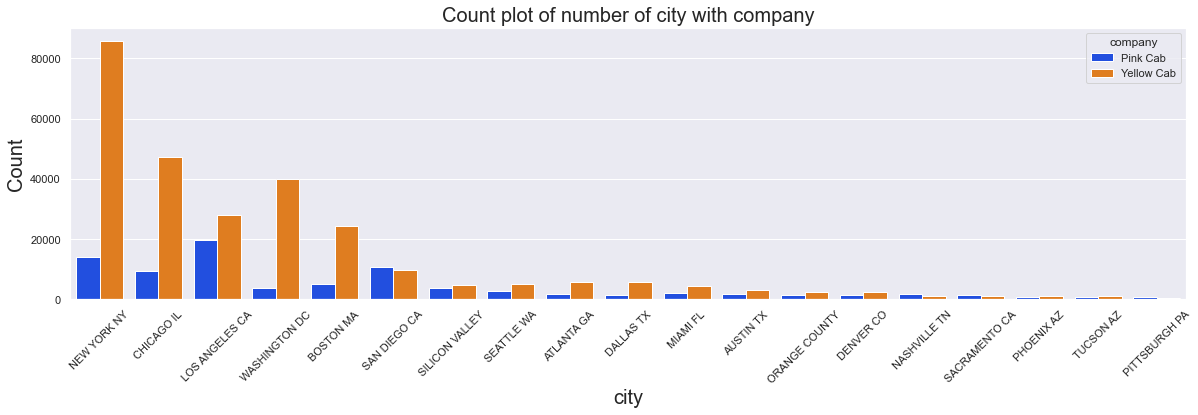

In [634]:
plotting_count('city','company') # Plot-1

**Observations from the above Plots**
- The top six cities with high population (cities above 1 million) are; New York NY, Chicago IL, Los Angeles CA, Miami FL, Silicon Valley and Orange County.
- The top seven city with users (users above 500,000) are; New York NY, San Franscisco CA, Chicago, Los Angeles CA, Washington DC, Boston MA & San Diego CA.
- Yellow Cab has most of its users in New York NY, Chicago IL, Los Angeles CA,  Washington DC, Boston MA & San Diego CA.
- Yellow Cab has only three cities that are in the top six cities namely; New York NY, Chicago IL, Los Angeles CA, while the remaining are in cities with population below 1 million.